# Projet Machine Learning - Notebook R

---


In [ ]:
# Installation des packages nécessaires :

# install.packages('gtsummary')
# install.packages("tidyr")
# install.packages("GGally")

In [1]:
# Chargement des librairies nécessaires :
# library(gtsummary)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(ggfortify)
library(GGally)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(Metrics)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
"le package 'Metrics' a été compilé avec la version R 4.3.3"


In [2]:
# Chargement des données :
path <- "../"
data = read.table(paste(path, "Data_Sustainable_Energy.csv", sep = ""), sep = ",", header = TRUE)

## Analyse Exploratoire des données

---

In [3]:
# Premiere visualisation du jeu de données :
head(data)
str(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

Notre jeu de données "data" est un data frame contenant
- 3649 observations (lignes)
- 21 variables (colonnes)

Parmis ces dernières, nous pouvons observer :
- 2 variables qualitatives : Entity (176 pays) et Year (21 années)
- 19 variables quantitatives

In [4]:
# Transformation des données (qualitatif/quantitatif)

data$Entity = as.factor(data$Entity) # ok : 176 niveaux : 176 pays : ok
data$Year = as.factor(data$Year) # ok : 21 niveaux : cohérent car de 2000 à 2020 : ok
data$Density.n.P.Km2. = as.numeric(gsub(",","", data$Density.n.P.Km2.)) # ok : c'est bien passé en quantitatif/num

str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclea

In [5]:
# Analyse des valeurs manquantes :

B = summary(data) # nous permet de regarder le nombre de NA par variable

Val_Manquante = data.frame(B[7,]) # on récupère seulement le nombre de NA par variable

Val_Manquante = separate(Val_Manquante, B.7..., c("Type", "Val"), sep=":") # création d'un tableau avec les valeurs

Val_Manquante$Val = as.numeric(gsub(",",".", Val_Manquante$Val))
Val_Manquante$Val = Val_Manquante$Val/36.49 # calcul d'un pourcentage

Val_Manquante

,Type,Val
,<chr>,<dbl>
Entity,(Other),96.54699918
Year,(Other),71.22499315
Access.to.electricity....of.population.,NA's,0.27404768
Access.to.clean.fuels.for.cooking,NA's,4.63140586
Renewable.electricity.generating.capacity.per.capita,NA's,25.51383941
Financial.flows.to.developing.countries..US...,NA's,57.24856125
Renewable.energy.share.in.the.total.final.energy.consumption....,NA's,5.31652508
Electricity.from.fossil.fuels..TWh.,NA's,0.57550014
Electricity.from.nuclear..TWh.,NA's,3.45300082


D'après ce tableau, nous pouvons observer que les variables contenant le plus de valeurs manquantes sont :
- Renewable.electricity.generating.capacity.per.capita (colonne 5)
- Financial.flows.to.developping.countries..US... (colonne 6)
- Renewables....equivalent.primary.energy (colonne 15)

In [6]:
# Suppression des variables contenant trop de valeur manquantes : 
data = data[,c(-5, -6, -15)]
str(data) # ok c'est le bon truc

'data.frame':	3649 obs. of  18 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low.carbon.electricity....electrici

In [7]:
# On regarde le nombre de na par ligne (on veut suppr les lignes où y'a des na pour en avoir aucune)
data = na.omit(data)
# on renomme nos variables car les noms sont trop longs.
colnames(data) <- c("Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils",
                     "Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level",
                     "Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude")
str(data) # on a bien 2868 lignes et nos noms de variables ont bien été modifiés

summary(data)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                  : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec        : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels       : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_from_fossils     : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_from_renewables  : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon_elec       : num  67 62.9 63.4 76.2 78.9 ...
 $ Prim_energy_cons      : num  230 204 252 304 354 ...
 $ Energy_intensity_level: num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_CO2             : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth            : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Gdp_capita            : num  191 211 242 26

                 Entity          Year      Access_to_elec    Access_to_fuels 
 Algeria            :  20   2014   : 147   Min.   :  1.252   Min.   :  0.00  
 Angola             :  20   2015   : 147   1st Qu.: 53.238   1st Qu.: 22.07  
 Antigua and Barbuda:  20   2016   : 146   Median : 97.000   Median : 81.55  
 Argentina          :  20   2017   : 146   Mean   : 76.585   Mean   : 62.17  
 Armenia            :  20   2018   : 146   3rd Qu.:100.000   3rd Qu.:100.00  
 Australia          :  20   2019   : 146   Max.   :100.000   Max.   :100.00  
 (Other)            :2748   (Other):1990                                     
 Renewable_energy_share Elec_from_fossils  Elec_from_nuclear
 Min.   : 0.000         Min.   :   0.000   Min.   :  0.00   
 1st Qu.: 9.188         1st Qu.:   0.290   1st Qu.:  0.00   
 Median :28.790         Median :   2.995   Median :  0.00   
 Mean   :35.802         Mean   :  76.694   Mean   : 15.34   
 3rd Qu.:60.667         3rd Qu.:  25.788   3rd Qu.:  0.00   
 Max.   :9

### Analyse unidimensionnelle

Plot chaque variable en histogramme, quelles variables on transforme ? Peut être renormalisation de certaines? 

**Question 4 :** histogramme, boxplot, standardiser et/ou appliquer transformations

**Unités des variables**

% : Access to electricity (3) ; Access to clean fuels (4) ; Renewable energy share (5) ; low carbon electricity (9) ; gdp growth (13)

TWh : Electricity (6, 7, 8)

KWh : Primary energy consumption (10) ;

Mj : Energy intensity level (11) ;

Metrics tones per capita : Value CO2 (12) ;

PIB : GDP per capita (14)

P/Km² : Density (15)

Km² : Land area (16)

° : Latitude (17) ; Longitude (18)

In [ ]:
## Faire phrase d'interprétation avec unités pour dire qu'on compare pas pour l'instant.


options(repr.plot.width = 15, repr.plot.height = 10)

boxplot(data[,-c(1,2)]) # on voit pas grand chose : pas les mêmes unités et échelles

boxplot(data[,c(6:8)]) # boxplot electricity : on n'y voit rien : trop de outliers

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

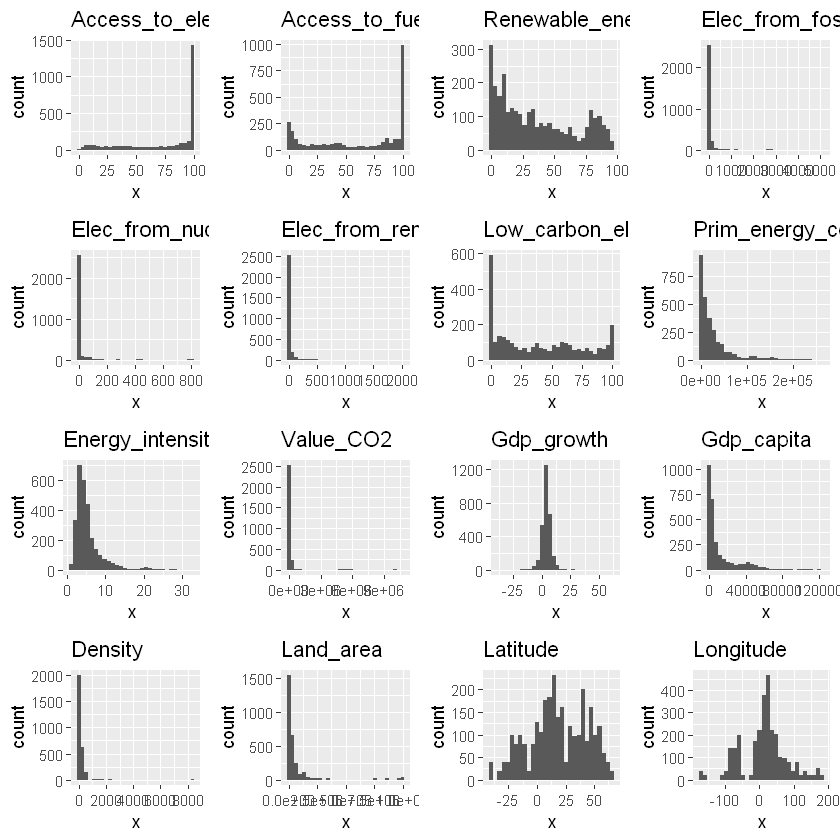

In [8]:
# tentative d'histogrammes par boucle avant transformation des données

p = list()
j=1

for (i in names(data)){
    # on affiche que l'histogramme des variables quantitatives
    if (is.numeric(data[[i]])) {
        data_copy <- data[[i]] # on créé une copie des données à chaque itération
        p[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=i)
    } 
}
                 
grid.arrange(grobs=p)

D'après les histogrammes, on peut voir que certaines variables ne sont pas gaussiennes. Or pour la suite nous aurons besoin de les rendre gaussiennes dans certains modèles. 
On souhaiterait transformer les variables suivantes en leur appliquant un log : 
- 

[1] "Access_to_fuels"
[1] "Renewable_energy_share"
[1] "Elec_from_fossils"
[1] "Elec_from_nuclear"
[1] "Elec_from_renewables"
[1] "Low_carbon_elec"
[1] "Gdp_growth"


Warning message in log(data[, i] + 1):
"Production de NaN"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 225 rows containing non-finite values (`stat_bin()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `

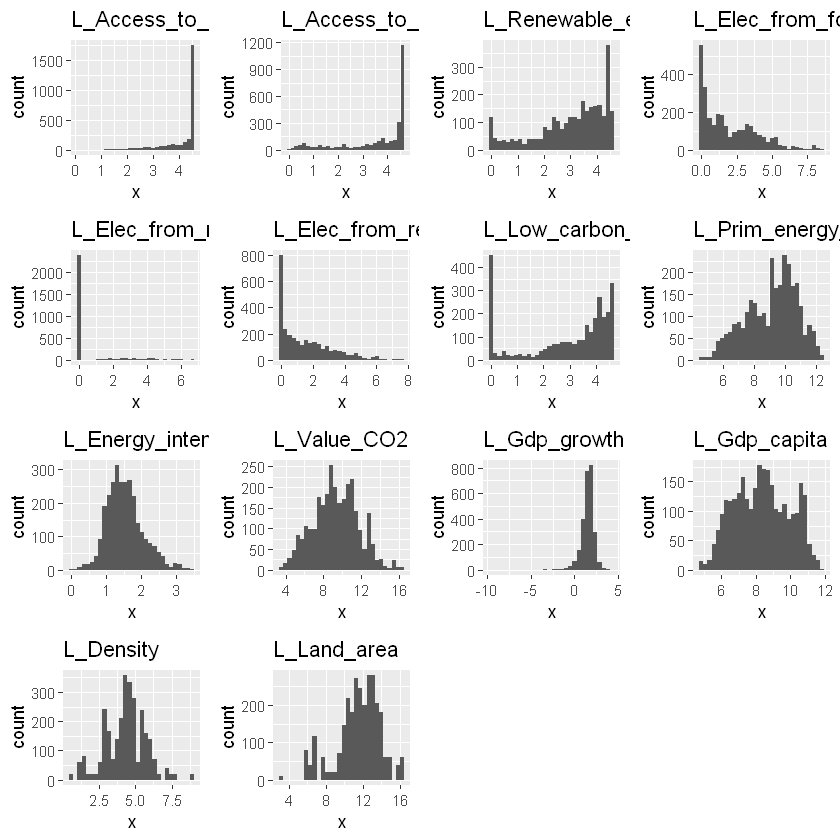

In [9]:
l = list()

# Mettre que les variables que l'on veut changer / ne pas log tout directement

Var_names = names(data[,1:16])

for (i in Var_names){
    # on n'affiche que l'histogramme des variables quantitatives
    if (is.numeric(data[[i]])) {
        L_var <- paste("L_",i,sep="")
        if (all(data[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
            data[,L_var] <- log(data[,i])
        } else {
            print(i)
            data[,L_var] <- log(data[,i]+1)
        }
        data_copy <- data[[L_var]] # on créé une copie des données à chaque itération
        l[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=L_var)
    } 
}
                 
grid.arrange(grobs=l)

In [ ]:
str(data)

In [10]:
data_centre <- data[,c(1,2,3,4,5,22,23,24,9,26,27,12,13,30,31,32,17,18)]
str(data_centre)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ L_Elec_from_fossils     : num  0.27 0.285 0.293 0.182 0.182 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.489 0.445 0.464 0.495 0.56 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ L_Prim_energy_cons      : num  5.44 5.32 5.53 5.72 5.87 ...
 $ L_Energy_intensity_level: num  0.336 0.182 0.344 0.405 0.425 ...
 $ Value_CO2               : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth              : num  8.83 1.41 11.23 5.36 13.83 ...
 $ L_Gdp_capita            : num  5.25 5.35 5.49 5.57 5.89 ...
 $ L_Den

On va restandardiser : 

- On tente un log sur celles qui ont un pic d'un côté.
- On tente racine sur d'autres.

Proposition à faire à Emilight et Paolight :
- Gdp grosse en sqrt et le reste en log point final à la ligne arretez de discuter.

Et on enlève celle qu'on utilise plus.

In [ ]:
# A RUN UNE SEULE FUCKING FOIS PAS DEUX PAS TROIS

# data4 <- data4[,c(1, 2, 3, 4, 5, 21, 23, 25, 9, 27, 29, 12, 34, 35, 37, 39, 17, 18)]
#str(data4)

**Nature des variables**

Faire blabla sur type des variables : en tout 18 variables 
- Entity et Year = 2 qualitatives (qui sont bien en facteurs)
- Le reste quantitative = 16 

In [ ]:
# Piechart

options(repr.plot.width = 15, repr.plot.height = 10)

p1 = ggplot(data, aes(x="", y=Entity, fill=factor(data[,1]))) + geom_col() + coord_polar(theta = "y") # pays on enlève
p2 = ggplot(data, aes(x="", y=Year, fill=factor(data[,2]))) + geom_col() + coord_polar(theta = "y")

grid.arrange(p1,p2, ncol=1)

**Interprétation**

Comme on a enlevé les lignes contenant des données manquantes, certains pays ont moins de relevé par années que d'autres. Il est important de prendre cela en compte. C'est ce qu'on observe sur ce pie, certaines années ont plus de valeurs que d'autres (et on voit assez bien qu'on a globalement beaucoup plus de données sur les années récentes, et que plus les relevés sont lointains moins on a de données.

**Grande hétérogéneite de CO2**

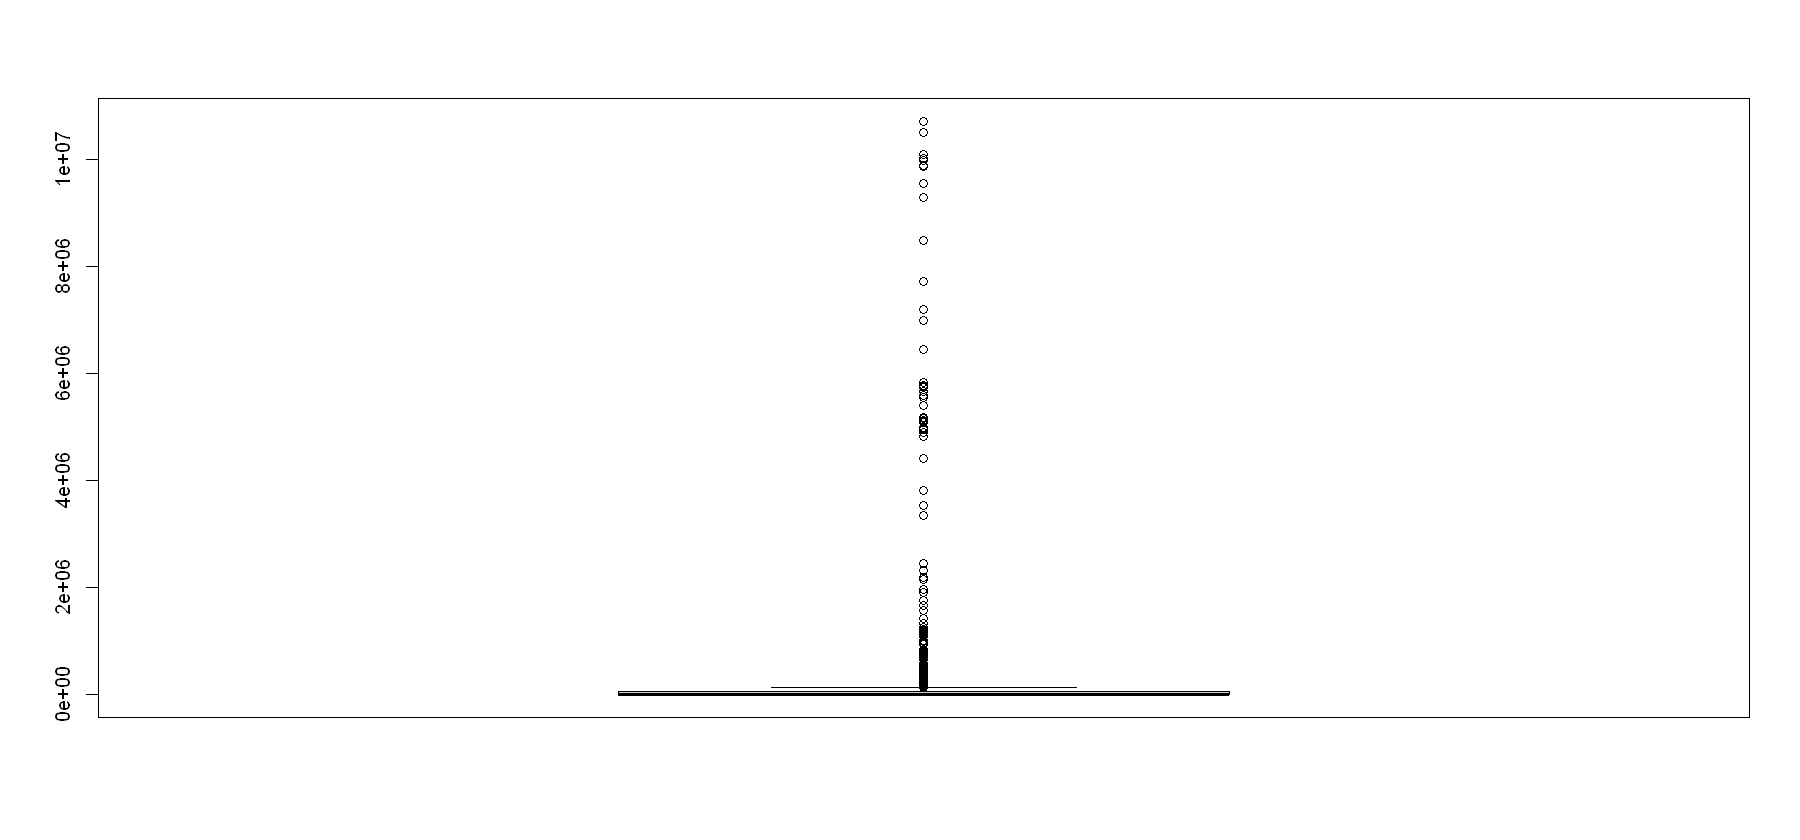

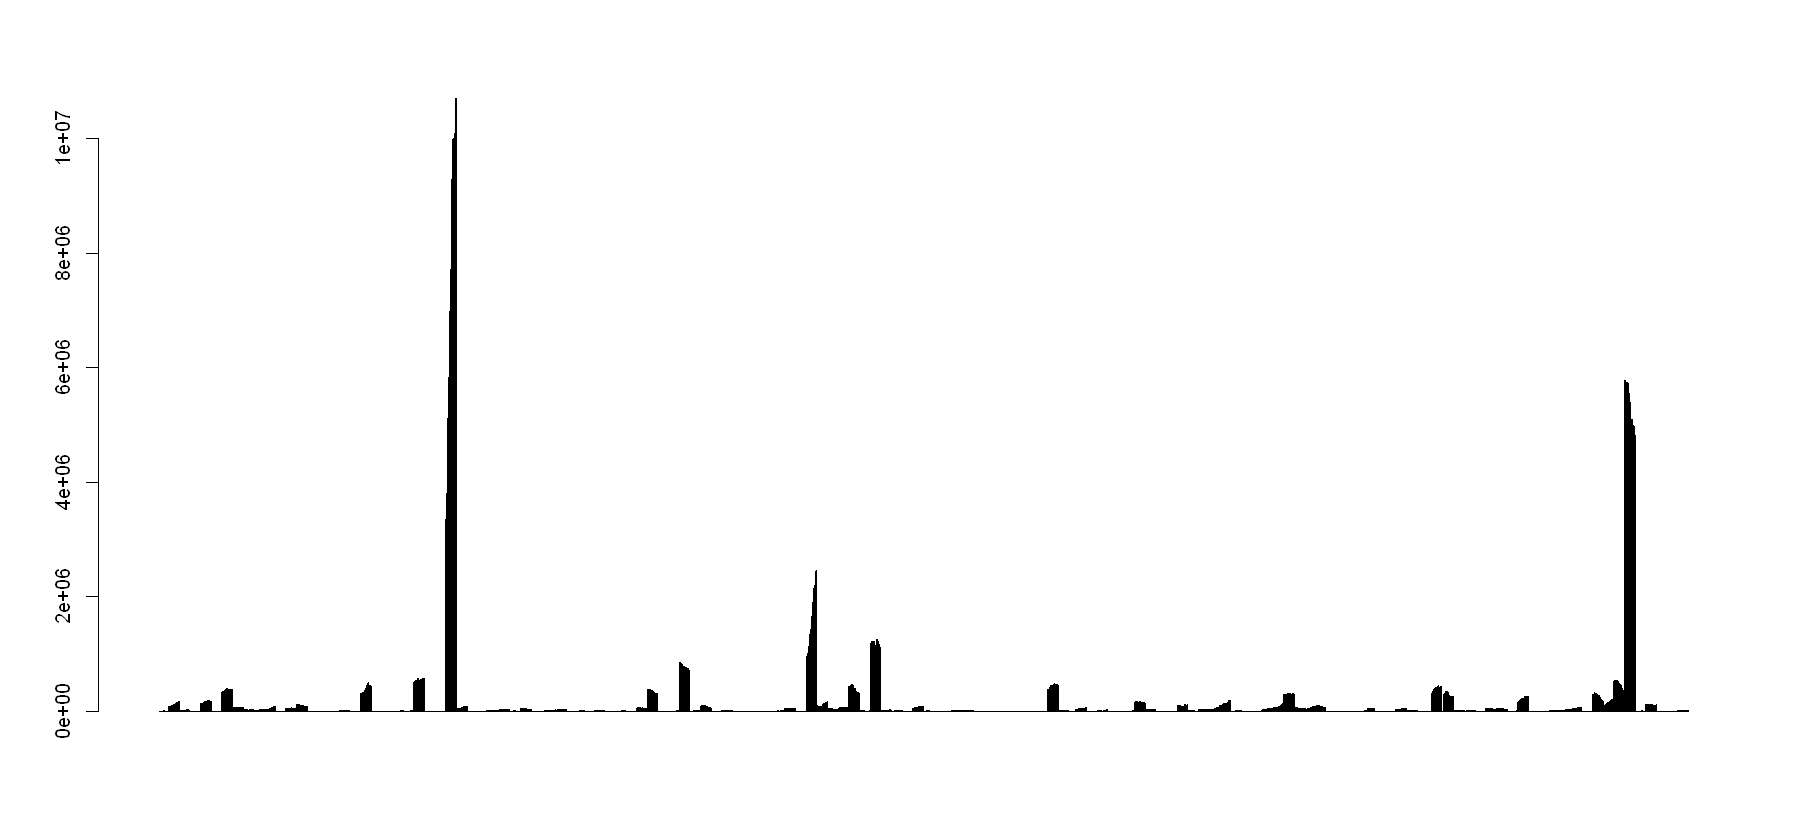

In [15]:
options(repr.plot.width = 15, repr.plot.height = 7)

boxplot(data[,12])
barplot(data[,12])

In [11]:
# Attention dans cette cellule il y avait encore du data4 alors qu'il me seblait les avoir tous enlevés..
# Je viens de les re-enlever
# Si jamais il y a un petit problème c'est que j'ai peut être mal fait les modifications ?

nb_annee_pays = list()

j=1

for (i in levels(data_centre[,1])) {
    nb_annee_pays[[j]] = sum(grepl(i, data_centre$Entity))
    j=j+1
}

moy_annee_co2 = list() ## TESTER AFFICHER SUR UNE MAP

No = 1

for (j in levels(data[["Entity"]])) {
    data_sub = subset(data_centre, data$Entity==j)
    # moy_value_co2[[No]] = c(j, sum(data_sub[,12])/nb_annee_pays[[No]])
    moy_annee_co2[[No]] = sum(data_sub[,12])/nb_annee_pays[[No]]
    No = No+1
}

moy_annee_co2 = data.frame(moy_annee_co2)

colnames(moy_annee_co2) = levels(data[["Entity"]])

# head(moy_annee_co2)

# order(moy_annee_co2)

moy_annee_co2 = t(moy_annee_co2)

colnames(moy_annee_co2) = c("Moyenne_CO2")

head(moy_annee_co2)

moy_ordonnee = order(moy_annee_co2, decreasing=TRUE)

head(moy_annee_co2[moy_ordonnee,])

,Moyenne_CO2
Afghanistan,4643.529
Albania,NaN
Algeria,119921.000
Angola,21689.500
Antigua and Barbuda,513.000
Argentina,160462.002


China United States         India         Japan       Germany 
    7636642.5     5329538.5     1633979.0     1183734.5      773644.5 
       Canada 
     547644.5

En faisant une moyenne de la consommation de CO2 (en metric tones per capita) des différents pays sur les années observées, on observe que les pays les plus polluants sont : 
- La Chine
- Les Etats-Unis
- L'Inde
- Le Japon
- L'Allemagne

### Analyse Descriptive Multidimensionnelle

---

On va ici regarder comment les variables intéragissent entre elles, leurs corrélations, etc.

On effectue cette analyse sur le jeu de données centrée (*ie* avec les variables qu'on a transformé avec du log par exemple).

In [ ]:
# str(data)
str(data_centre)

In [ ]:
# on regarde les dépendances 2 à 2
ggpairs(data_centre[,c(3:18)])

In [ ]:
corrplot(cor(data_centre[,3:18]), method="ellipse")

**Interprétation**

D'après le graphe des corrélations, on peut remarquer de fortes corrélations positives entre :
- Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita
- plus faiblement : L_Elec_from_fossils, L_Elec from_nuclear, L_Elec_from_renewables

On peut aussi observer des corrélations négatives entre : 
- Renewable_energy_share et Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita
- plus faiblement : L_Land_area et L_Density

La variable C02 semble corrélée avec les trois variables élec.

Il semble exister des corrélations avec la latitude mais pas spécialiement avec la longitude. Position Nord/Sud impacte sur le CO2 (pays développés ?)

Gdp growth semble être corrélée à pas grand chose. Longitude aussi.

### Analyse en Composantes Principales

---

On effectue ici une ACP dans un double objectif :
- Exploratoire : l'ACP, peut nous permettre de mieux comprendre et étudier le jeu de données
- Réduction de dimension : l'ACP peut nous permettre de réduire la dimension de notre jeu de données en créant des métavariables portant une part importante de la variabilité du jeu de données

Comme précédemment, on effectue l'ACP sur le jeu de données avec les variables recentrées.

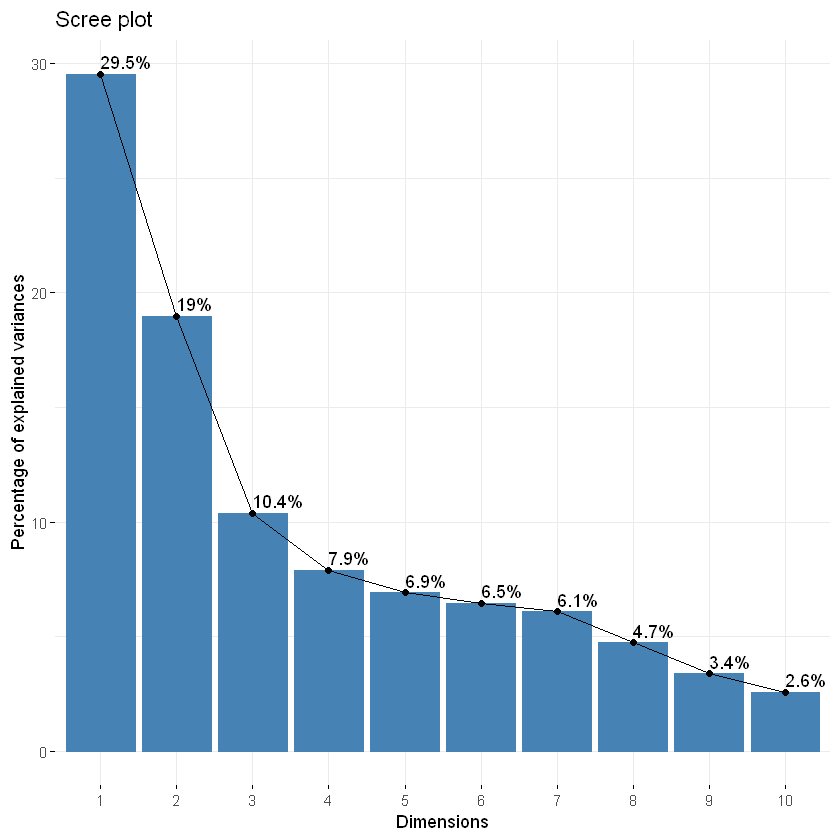

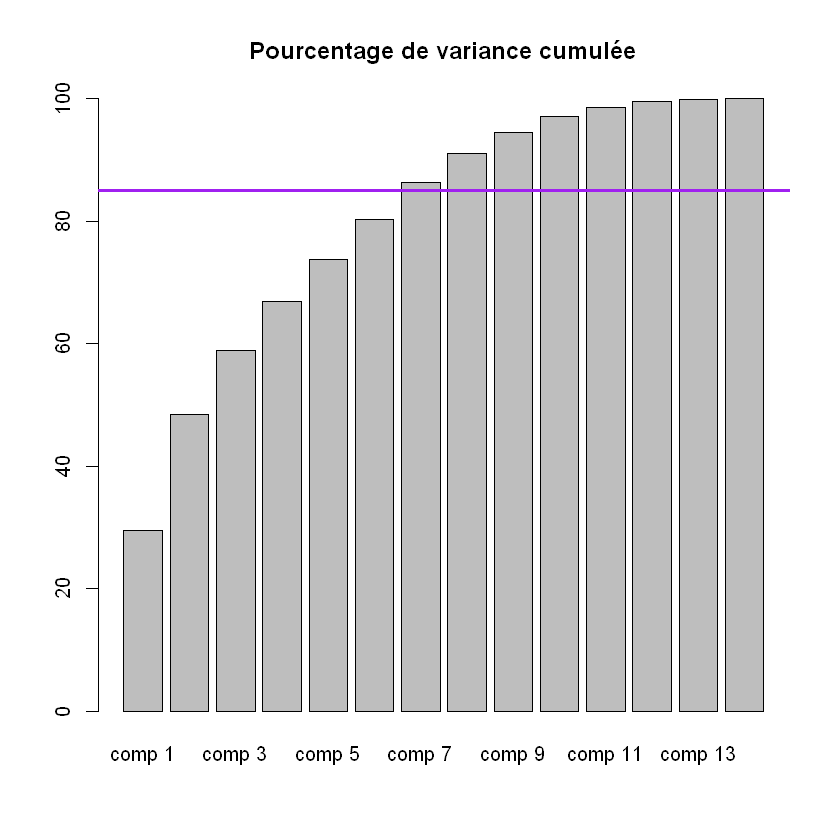

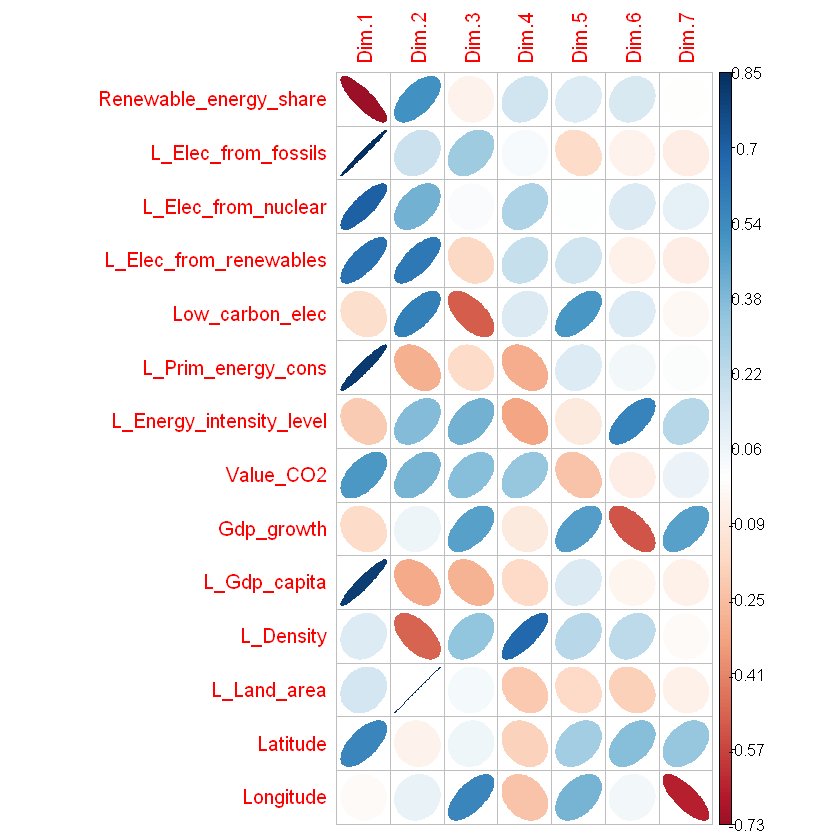

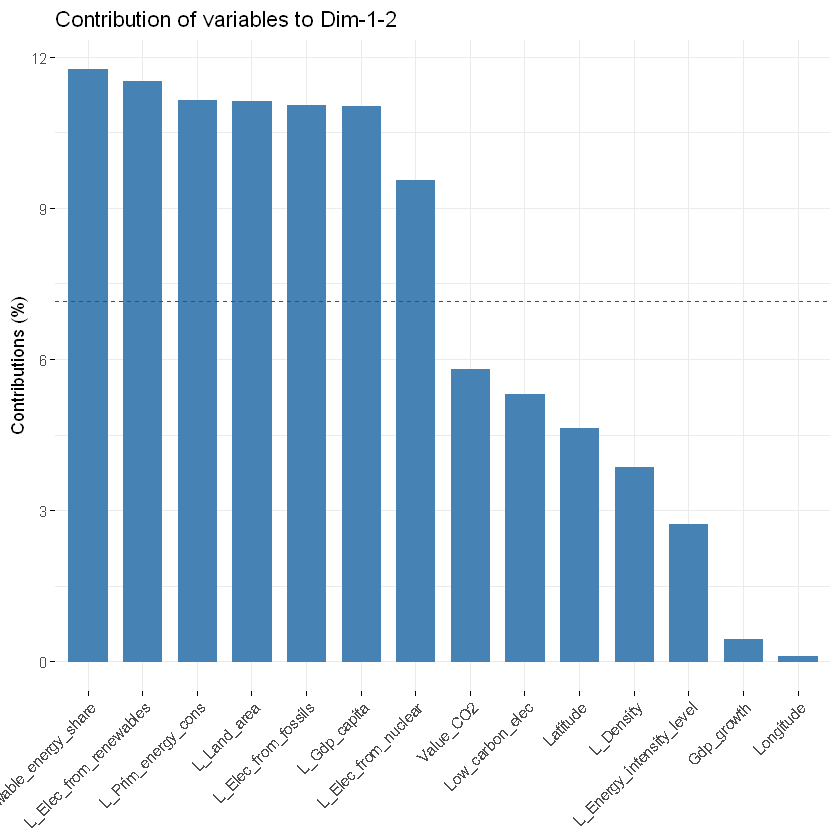

In [12]:
acp <- PCA(data_centre[,3:18], scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, quanti.sup = 2, ncp = 7)

# Décroissance des valeurs propres

g1<-fviz_eig(acp, addlabels = TRUE)
g1

var_cumul = acp$eig[,3]
barplot(var_cumul, main = "Pourcentage de variance cumulée")
abline(h=85, col="purple", lwd = 3)

corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

fviz_contrib(acp, choice = "var", axes = c(1,2))

## On garderai 7 variables explicatives.

In [ ]:
fviz_pca_var(acp)
# fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_ind(acp, label="none", habillage=data_centre$Year)

On garde sept composantes principales ce qui nous permet de conserver plus de 85% de la variance totale du jeu de donénes.

La dimension 1 semble bien expliquer Elec_from_fossil, Primary_energy_consumption et gsp_capita.

La dimension 2 semble bien expliquer Land Area.

Value CO2 globalement expliqué par les 5 premières dimensions.



Il faudrait tenter d'afficher les differents graphes en fonction des differentes dimensions pour voir si on peut voir quelle composante représente à peu près quoi (comme en AdD en gros).

In [ ]:
# ca marche pas lolilol
# data_reduced <- predict(acp)

**8) Visualiser la dépendence de la varibale 'Year' et de la variable à prédire**

'data.frame':	2868 obs. of  2 variables:
 $ Year     : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Value_CO2: num  1220 1030 1550 1760 1770 ...
'data.frame':	20 obs. of  2 variables:
 $ Year     : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Value_CO2: num  138016 139578 139321 144972 152039 ...


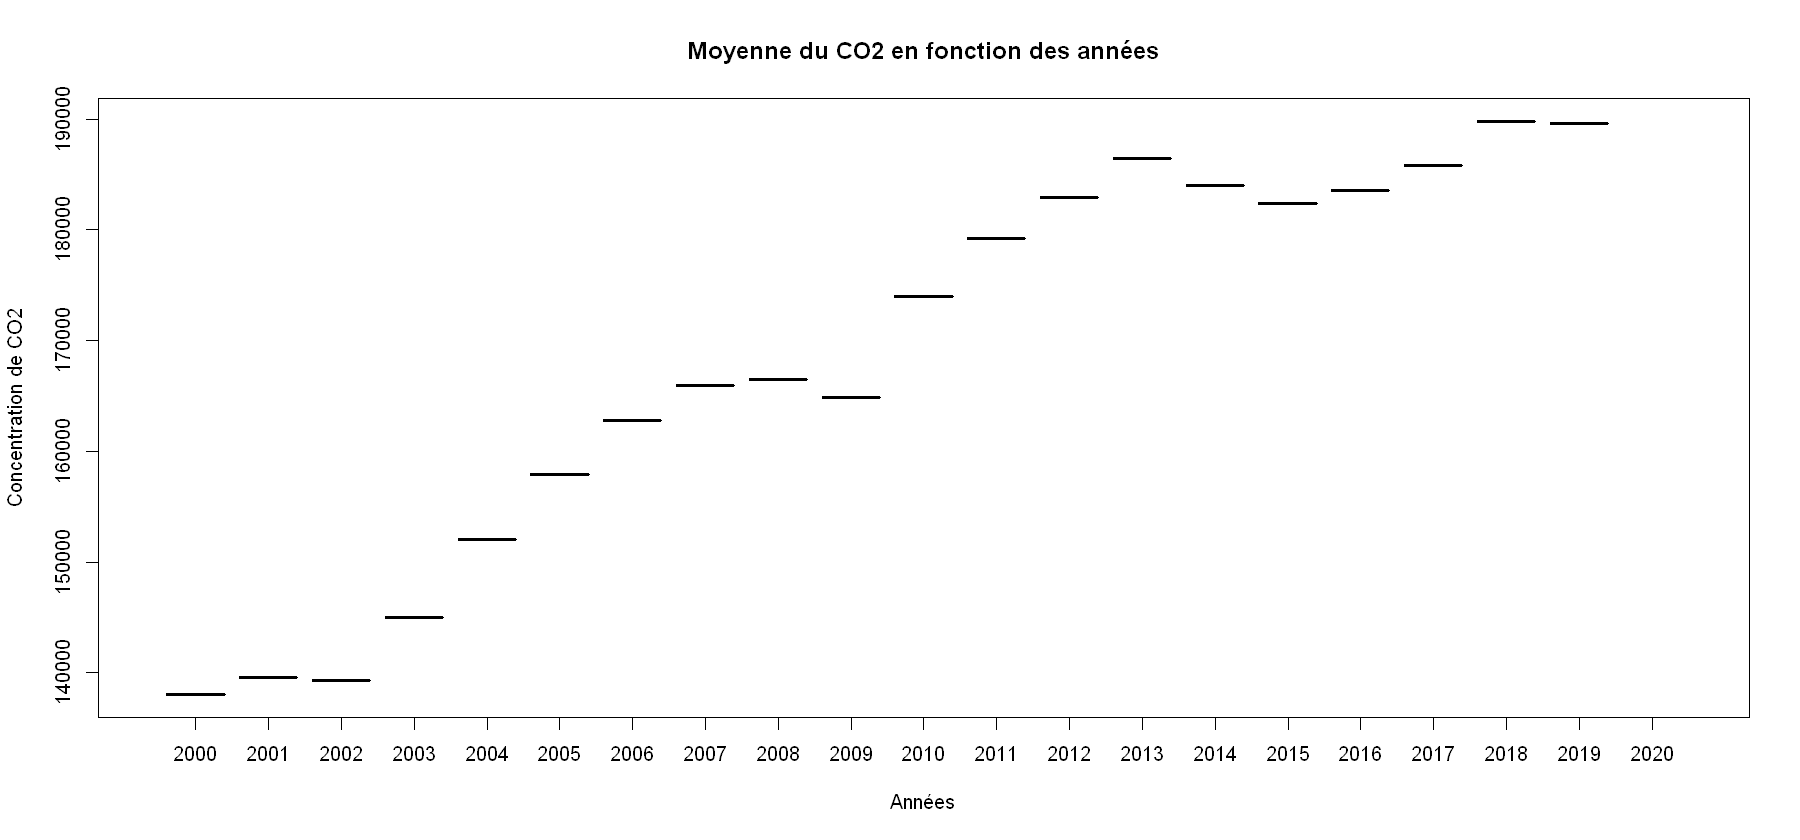

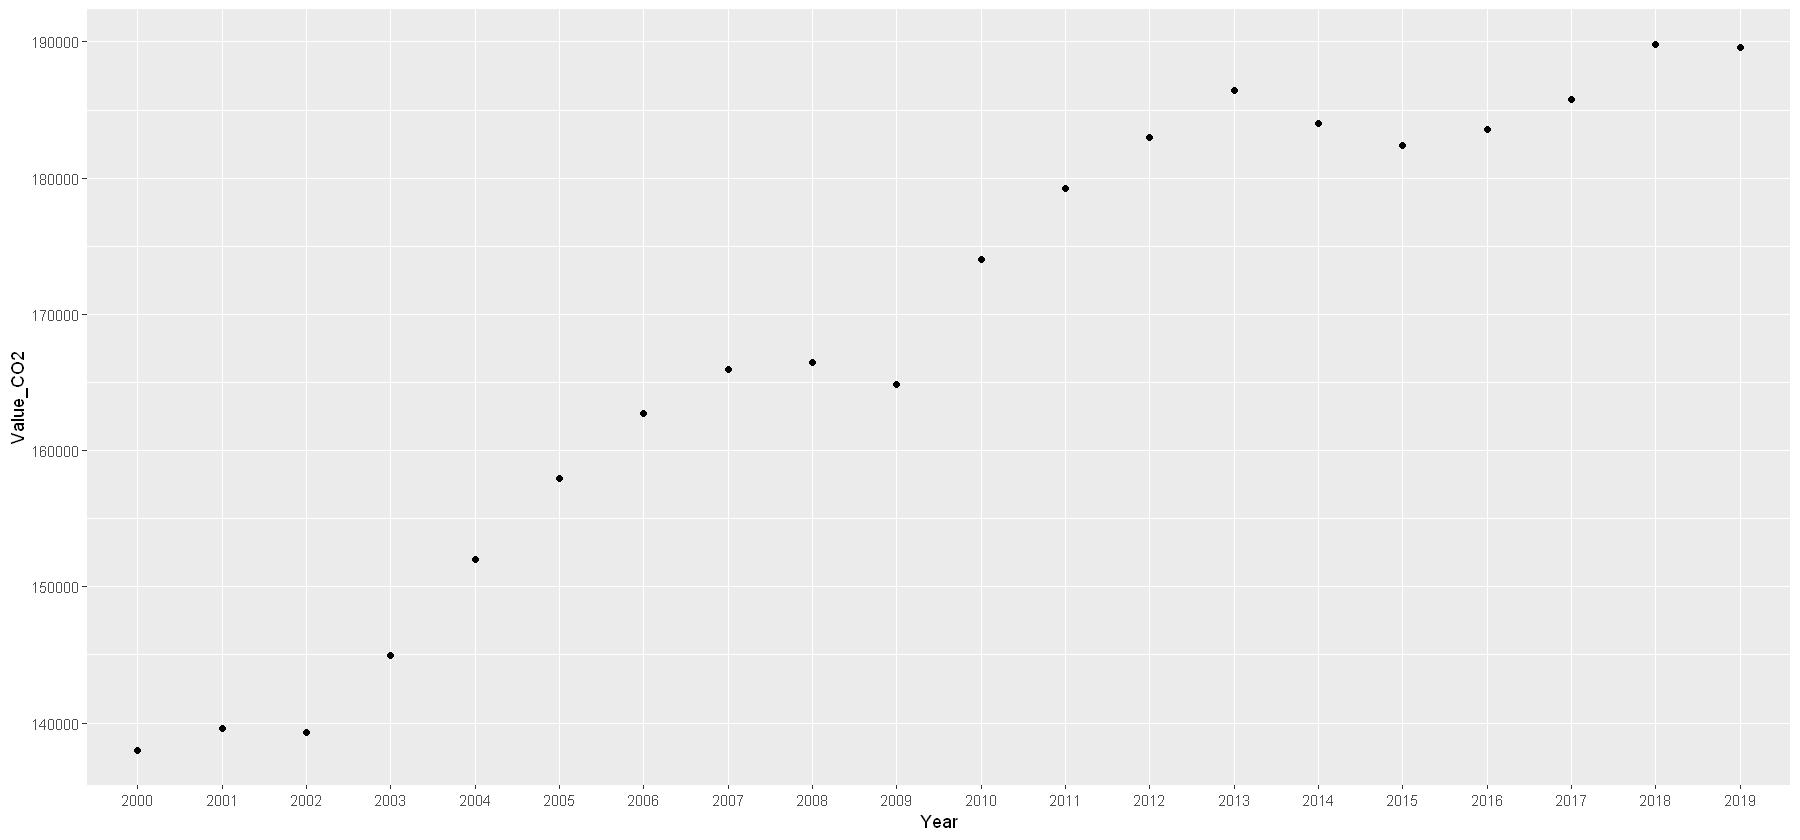

In [16]:
# Variable à prédire : Value-co2-emissions renommée en Value_CO2

Tab = data.frame(data$Year, data$Value_CO2)
colnames(Tab) = c("Year", "Value_CO2") # je récupère les deux variables que je veux utiliser
str(Tab)                               # data frame : 2868 * 2

Moy_annee = aggregate(Value_CO2 ~ Year, data = Tab, FUN = mean) # moyenne du CO2 selon les années, stockée dans un data frame 

str(Moy_annee) # data frame 20*2 : bizarre on n'a pas 21 lignes

# Moy_annee # Le dernier facteur n'apparait pas

# table(Tab$Year) # d'après ça, pas de valeur pour l'année 2020 ; étrange mais why not


# barplot(Moy_annee$Value_CO2 ~ Moy_annee$Year)
plot(Moy_annee$Value_CO2 ~ Moy_annee$Year, main = "Moyenne du CO2 en fonction des années",
     xlab = "Années", ylab = "Concentration de CO2")

# ggplot aura ma peau mais j'ai déjà ça ^^

# h1 <- ggplot(Moy_annee, aes(x = Year , y = Value_CO2 )) +
#   geom_histogram(binwidth = 5, fill = "blue", color = "black") +
#   labs(x = "Valeurs", y = "Fréquence", title = "Histogramme des valeurs")
# h1

ggplot(Moy_annee, aes(x = Year, y = Value_CO2)) + geom_point()

**Interprpétation**

On observe nettement que la moyenne de CO2 augmente très fortement en fonction des années.

Essayer de voir avec le coeff de corrélation qui devrait confirmer cela.

# Modélisation

---

##  Création des échantillons d'apprentissage et de test

Du coup pour être cohérent et si j'ai bien compris, toute la partie suivante je la fais sur les données transformées, *ie* sur **data_centre**.

Je construit un échantillon d'apprentissage comprennat 80% des données et un de test comprenant les 20% restant.

Je fais bien attention à enlever dans ces échantillons la variable *Value_CO2* car c'est celle que l'on doit prédire.

In [ ]:
# Brouillon
# fonction qui permet de représenter les résidus toujours à la même échelle
# on avait ça en tp mais je n'arrive pas à la faire fonctionner ici

gplot.res <- function(x, y, titre = "titre"){ 
    ggplot(data.frame(x=x, y=y),aes(x,y))+xlim(0, 250)+ylim(-150, 150) + geom_point(col = "blue")
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

In [30]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données

n_ind = nrow(data_centre) # nombre de lignes dans les données
n_var = ncol(data_centre) # nombre de colonnes
n_test = ceiling(n_ind * ratio_test) # Taille de l'échantillon test (ceiling = arrondis sup)

print(paste0("Nombre d'individus (total) : " , n_ind))
print(paste0("Nombre de variables : " , n_var))
print(paste0("Taille de l'échantillon de test (20% individus totaux): " , n_test))

indices_test = sample(1:n_ind, n_test) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr = setdiff(1:n_ind, indices_test)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr = data_centre[indices_appr,] #-c(1,2,12)] # Echantillon d'apprentissage ; CO2 = 12e var de data_centre
data_test = data_centre[indices_test,] #-c(1,2,12)] # Echantillon test

CO2_appr = data_centre[indices_appr, 12]
CO2_test = data_centre[indices_test, 12]

paste("Résumé de l'échantillon d'apprentissage : ", dim(data_appr)[1], "individus et ", dim(data_appr)[2], "variables")
paste("Résumé de l'échantillon de test : ", dim(data_test)[1], "individus et ", dim(data_test)[2], "variables")
paste("Résumé de CO2_appr : ",length(CO2_appr), "individus")
paste("Résumé de CO2_test : ", length(CO2_test), "individus")

[1] "Nombre d'individus (total) : 2868"
[1] "Nombre de variables : 18"
[1] "Taille de l'échantillon de test (20% individus totaux): 574"


[1] "Résumé de l'échantillon d'apprentissage :  2294 individus et  18 variables"

[1] "Résumé de l'échantillon de test :  574 individus et  18 variables"

[1] "Résumé de CO2_appr :  2294 individus"

[1] "Résumé de CO2_test :  574 individus"

## Modèles Linéaire

### 1 - Régression linéaire

#### Sans sélection de variable

Ca ne marche pas et je ne comprends pas pourquoi, mes résidus sont pas du tout bon c'est trop bizarre. Ca ressemble vraiment à rien.

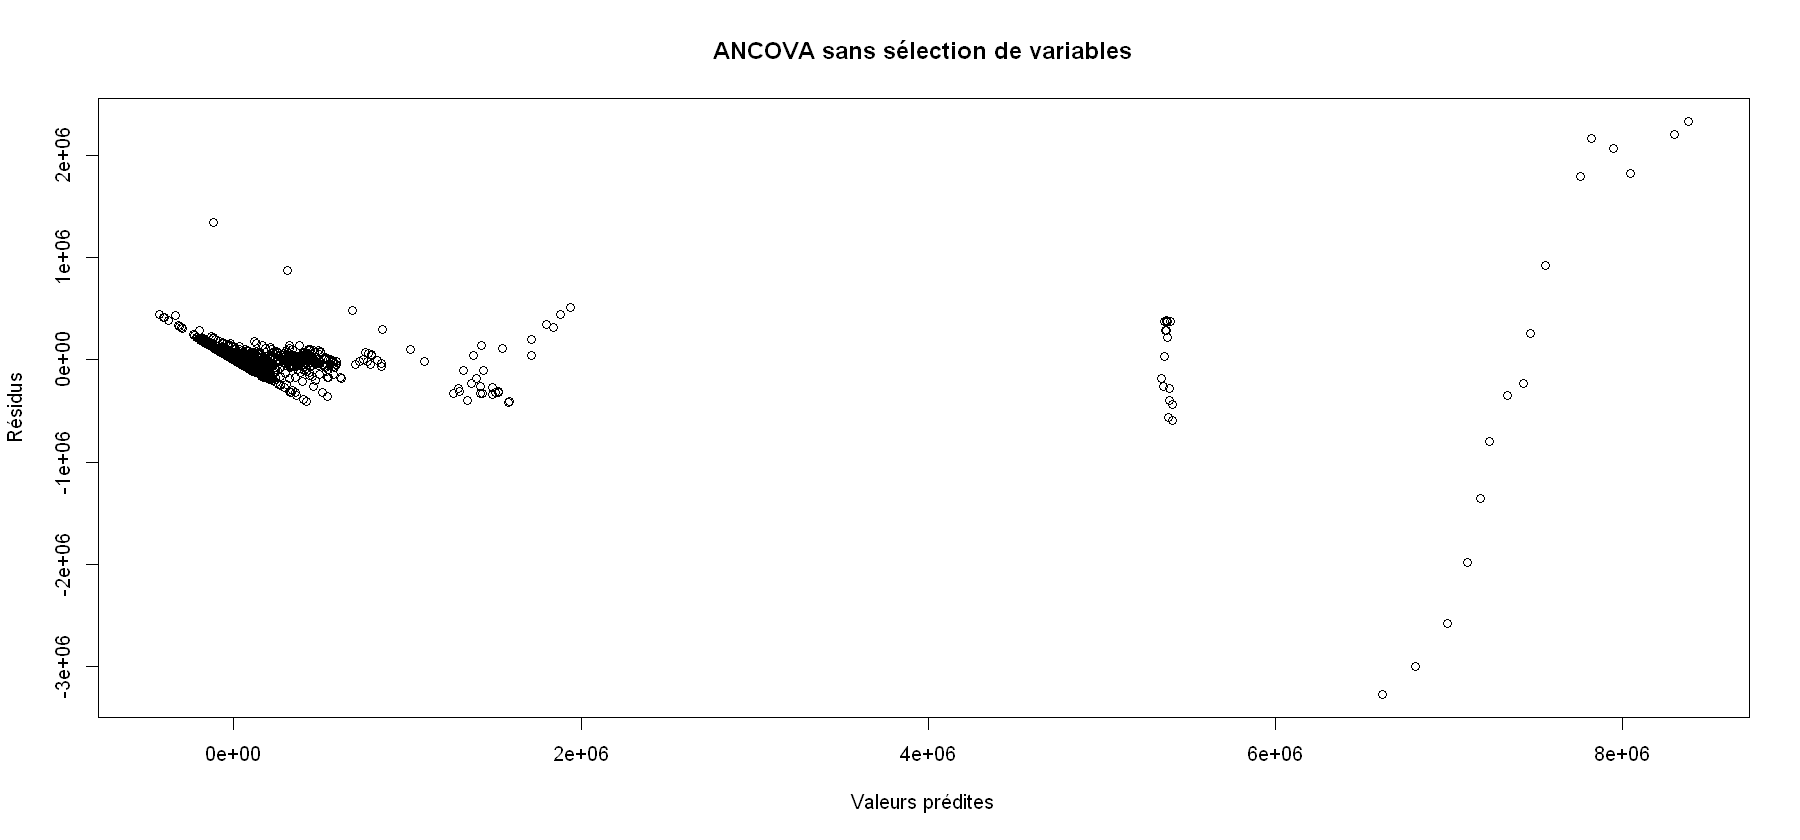

[1] "MSE pour régression linéaire sans intéraction =  34199597890.3982"

[1] "Coefficient R2 :  0.942256565088041"

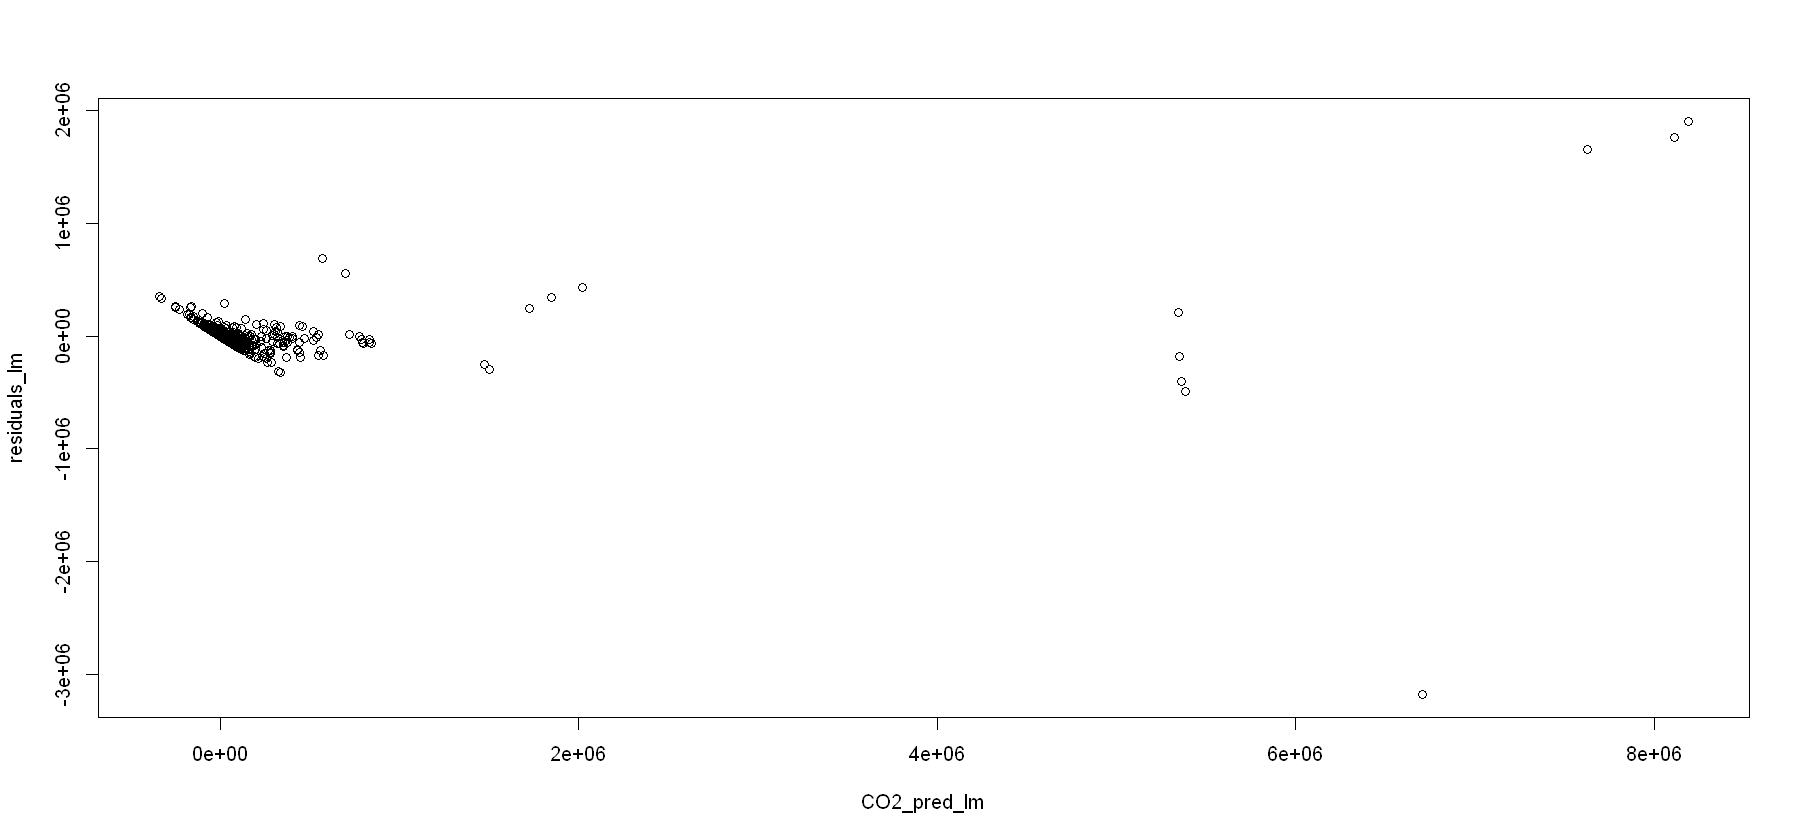

In [32]:
# Estimation du modèle sans interaction

reg.lm = aov(Value_CO2 ~ . , data=data_appr) # ANCOVA  car qualitatif + quantitatif

res.lm = reg.lm$residuals                   # Extraction des résidus
fit.lm = reg.lm$fitted.values               # Extraction des valeurs ajustées

plot(fit.lm, res.lm, main="ANCOVA sans sélection de variables", xlab = "Valeurs prédites", ylab = "Résidus")

# summary(reg.lm)
# coef(reg.lm) il y en a beaucoup

CO2_pred_lm = predict(reg.lm, data_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

# residuals_lm = CO2_test - CO2_pred_lm
# plot(CO2_pred_lm, residuals_lm)

mse_lm = mean(res.lm^2) # Moyenne des carrés des résidus
r2_lm = cor(CO2_test, CO2_pred_lm)^2

paste("MSE pour régression linéaire sans intéraction = ", mse_lm)
paste("Coefficient R2 : ", r2_lm)

#### Avec les termes quadratiques (long à run)

In [ ]:
# Estimation du modèle avec intéraction d'ordre 2

reg.lm2 = aov(Value_CO2 ~ .^2 , data=data_appr) # ANCOVA  car qualitatif + quantitatif
res.lm2 = reg.lm$residuals                     # Extraction des résidus
fit.lm2 = reg.lm$fitted.values                 # Extraction des valeurs ajustées

summary(res.lm2)

plot(fit.lm2, res.lm2, main="Modèle Linéaire avec intéractions d'ordre 2 sans sélection de variable", 
     xlab = "Valeurs prédites", ylab = "Résidus") # Graphe des résidus

summary(reg.lm2)
# coef(reg.lm2)

CO2_pred_lm2 = predict(reg.lm2, data_test) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse2 = rmse(CO2_test, CO2_pred_aov2) # Erreur quadratique moyenne 
r2_2 = cor(CO2_test, CO2_pred_aov2)^2

paste0("Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec intéraction ordre 2 : ", mse2)
paste0("Coefficient R2 : ", r2_2)

#### Avec pénalisation Lasso

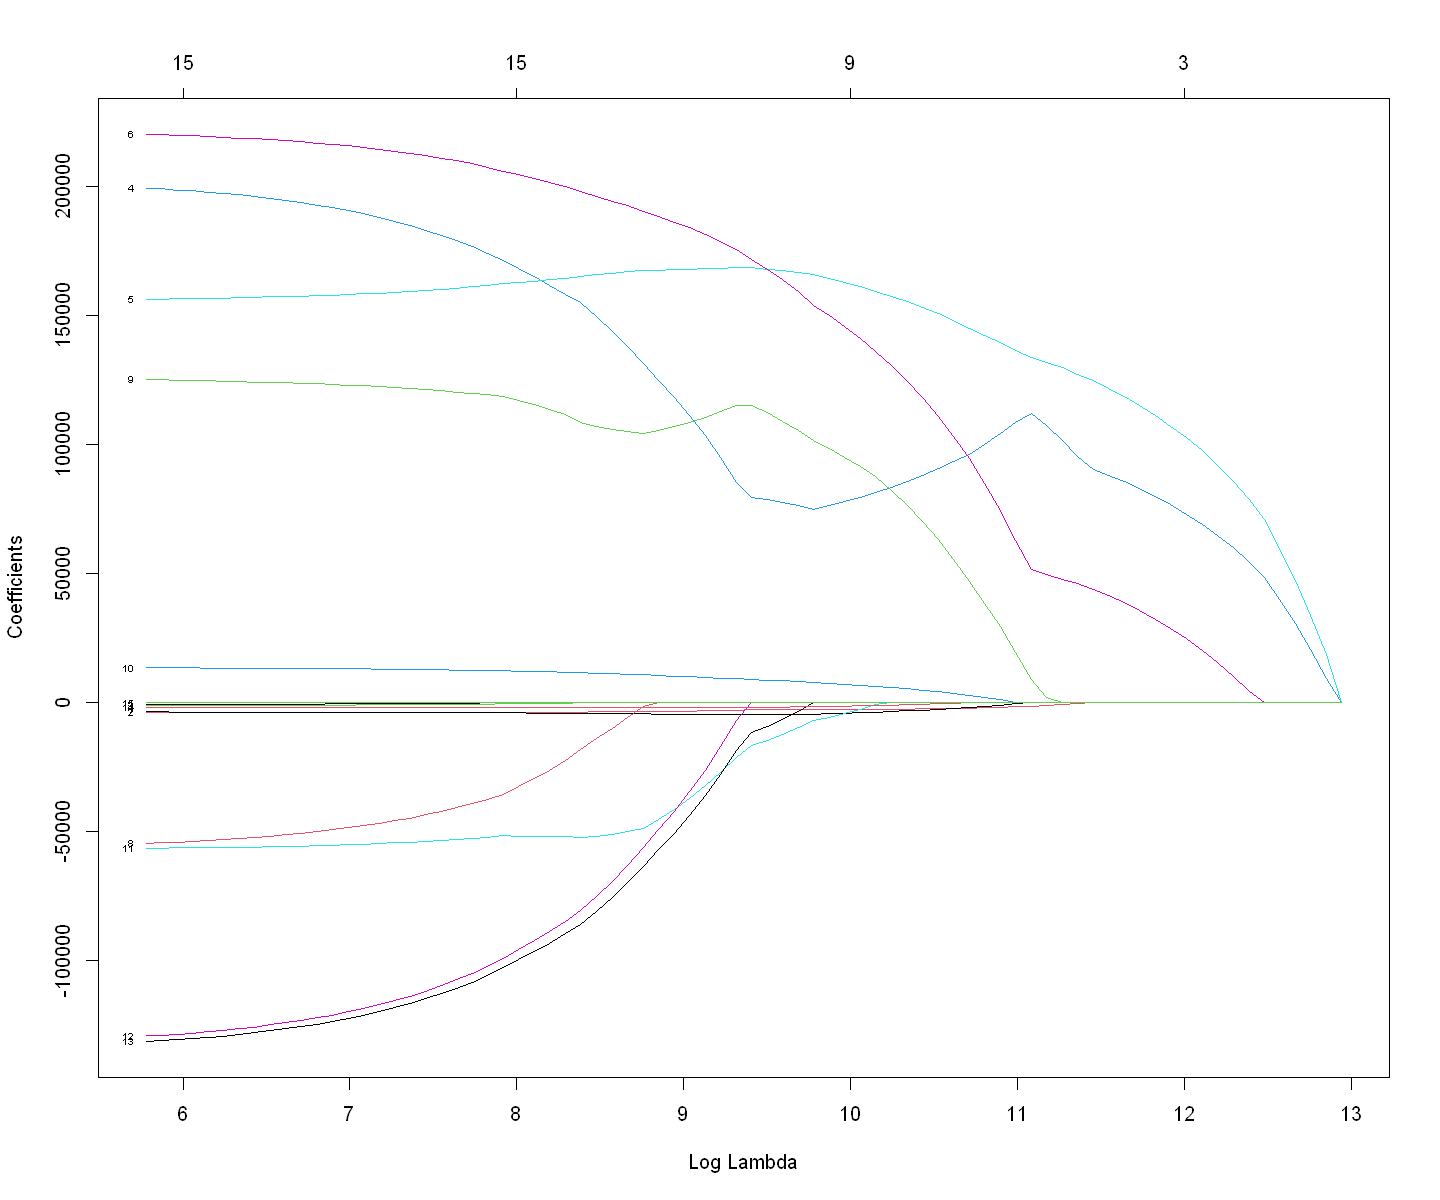

In [31]:
library(glmnet)

# avec des variables quantitatives seulement
reg.lasso.quanti = glmnet(y = CO2_appr, x = as.matrix(data_appr[, -c(1, 2)])) # alpha = 1 par défaut : LASSO
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)

x.mat = model.matrix(CO2_appr ~ . - 1, data = data_appr) # on récupère la matrice de design, on enlève intercept.

reg.lasso = glmnet(y = CO2_appr, x = x.mat, alpha = 1)

options(repr.plot.width = 12, repr.plot.height = 10)

plot(reg.lasso, xvar = "lambda", label = TRUE)

# legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat))) # si on affiche la légende on voit pas le graph entier...

**Interprétation :**

- Beaucoup trop de variables : comme il y a presque 200 modalités pour Entity et une vingtaine pour Year ça fait énormément de variables donc le graph n'est pas lisible

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  59218.854"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  389.621"

[1] "5.96517447175312"

[1] "Modèle correspondant à lambda1se = meilleur lambda par validation croisée : "

16 x 1 sparse Matrix of class "dgCMatrix"
                                   s1
(Intercept)              -131737.7970
Access_to_elec                 .     
Access_to_fuels            -1569.6432
Renewable_energy_share         .     
L_Elec_from_fossils       108663.4839
L_Elec_from_nuclear       136673.8347
L_Elec_from_renewables     62820.6169
Low_carbon_elec             -485.4577
L_Prim_energy_cons             .     
L_Energy_intensity_level   19573.0321
Gdp_growth                   142.1092
L_Gdp_capita                   .     
L_Density                      .     
L_Land_area                    .     
Latitude                       .     
Longitude                      .     

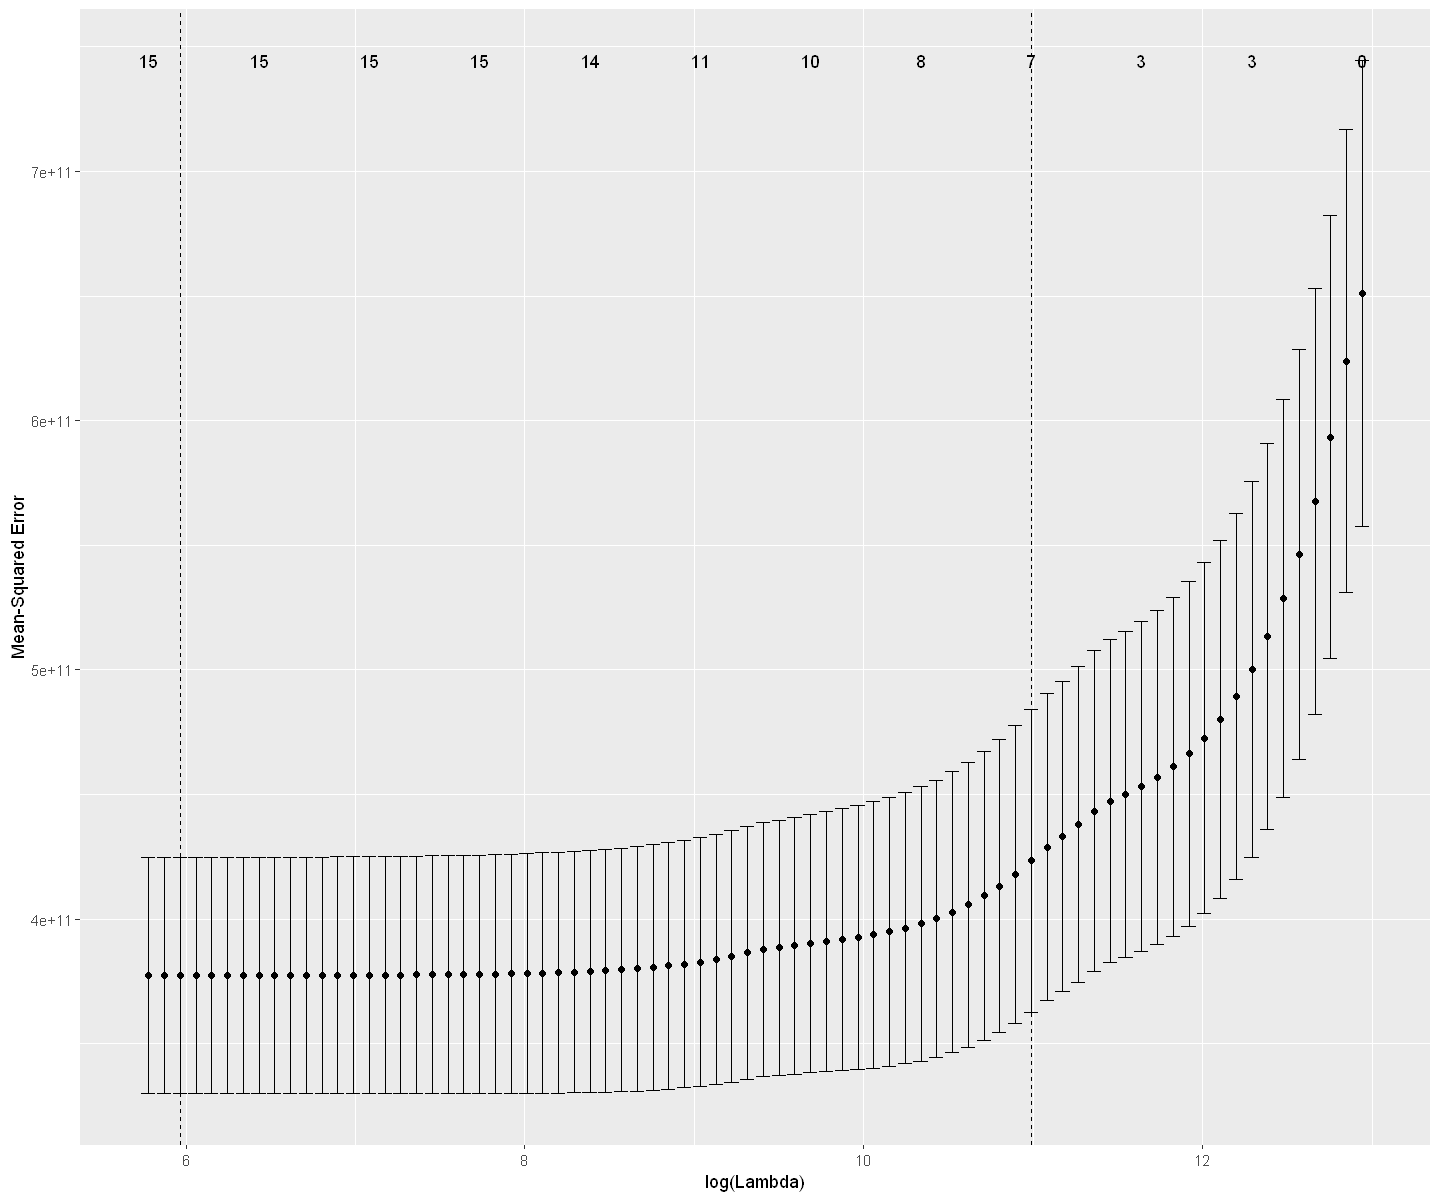

In [32]:
# on cherche à déterminer le meilleur Lambda pour notre model lasso : on va faire de la validation croisée (cross-validation)

reg.lasso.cv = cv.glmnet(y = CO2_appr, x = x.mat)

autoplot(reg.lasso.cv)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.lasso.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.lasso.cv$lambda.min, 3))
paste(log(round(reg.lasso.cv$lambda.min, 3)))

paste("Modèle correspondant à lambda1se = meilleur lambda par validation croisée : ")
coef(reg.lasso.cv, s="lambda.1se")

Cet autoplot = erreur de généralisation (R fait automatiquement de la validation croisée).

Les deux droites verticales :
- Première : la lambda pour la plus petite erreur.
- Seconde : le plus grand lambda pour que l'erreur moyenne de prédiction soit dans l'intervalle de confiance pour lambda_min.

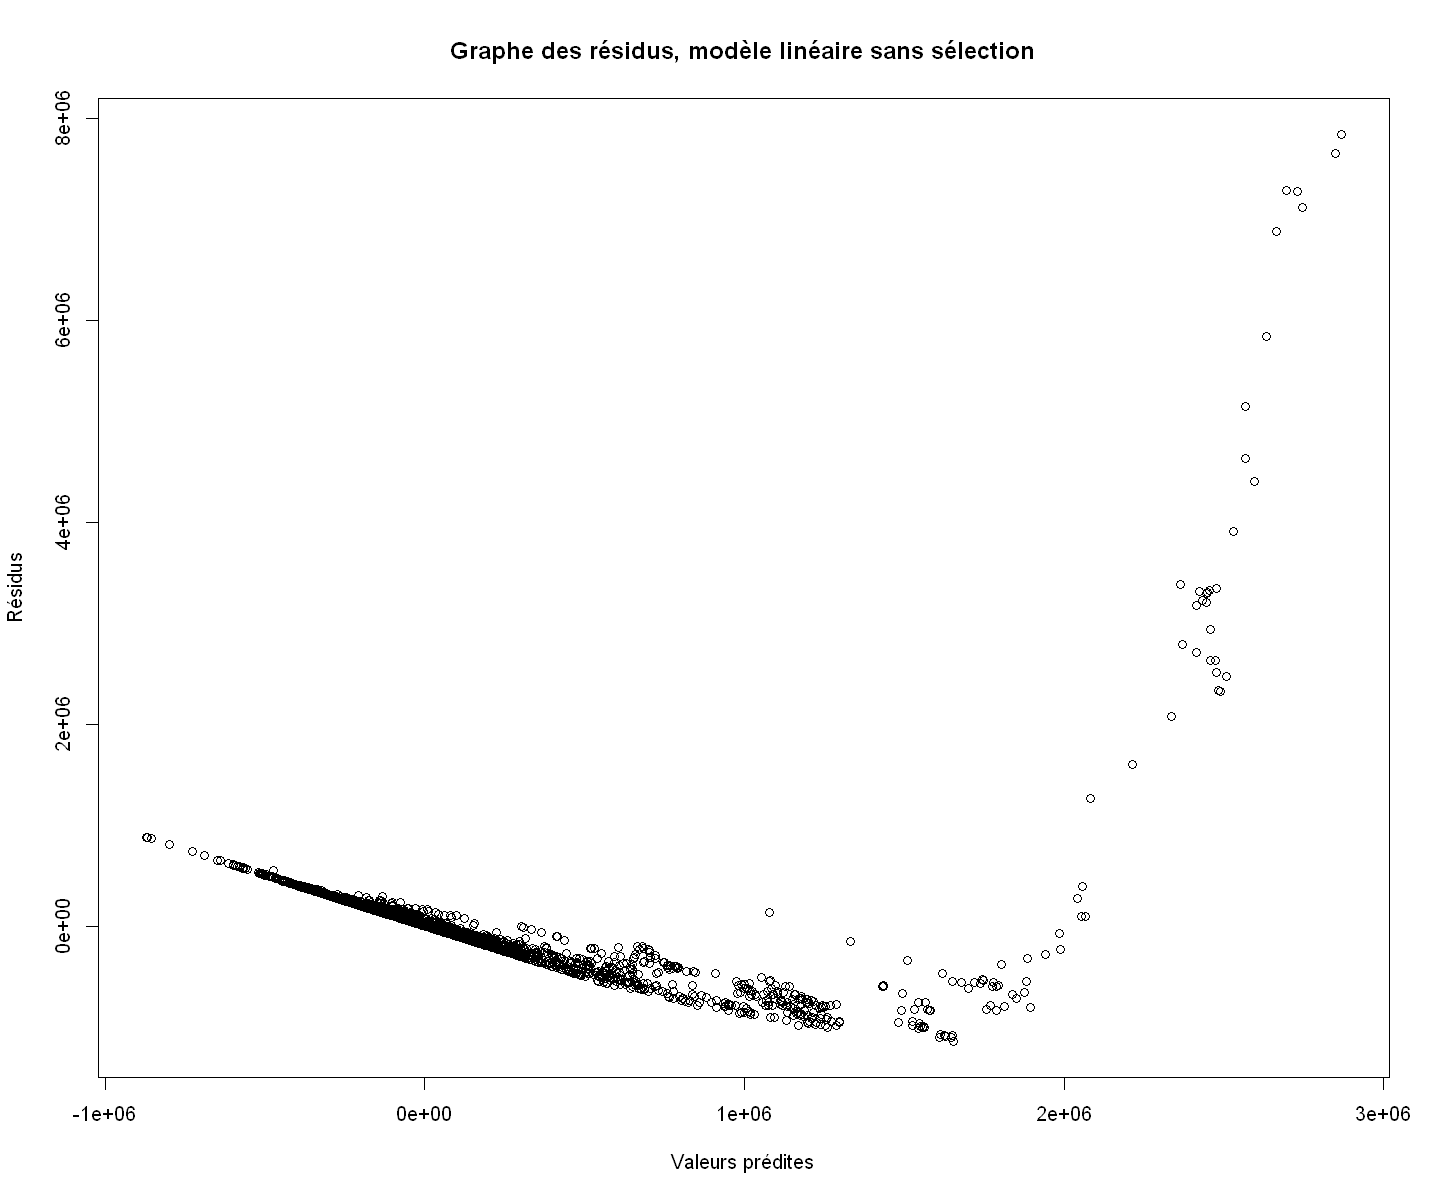

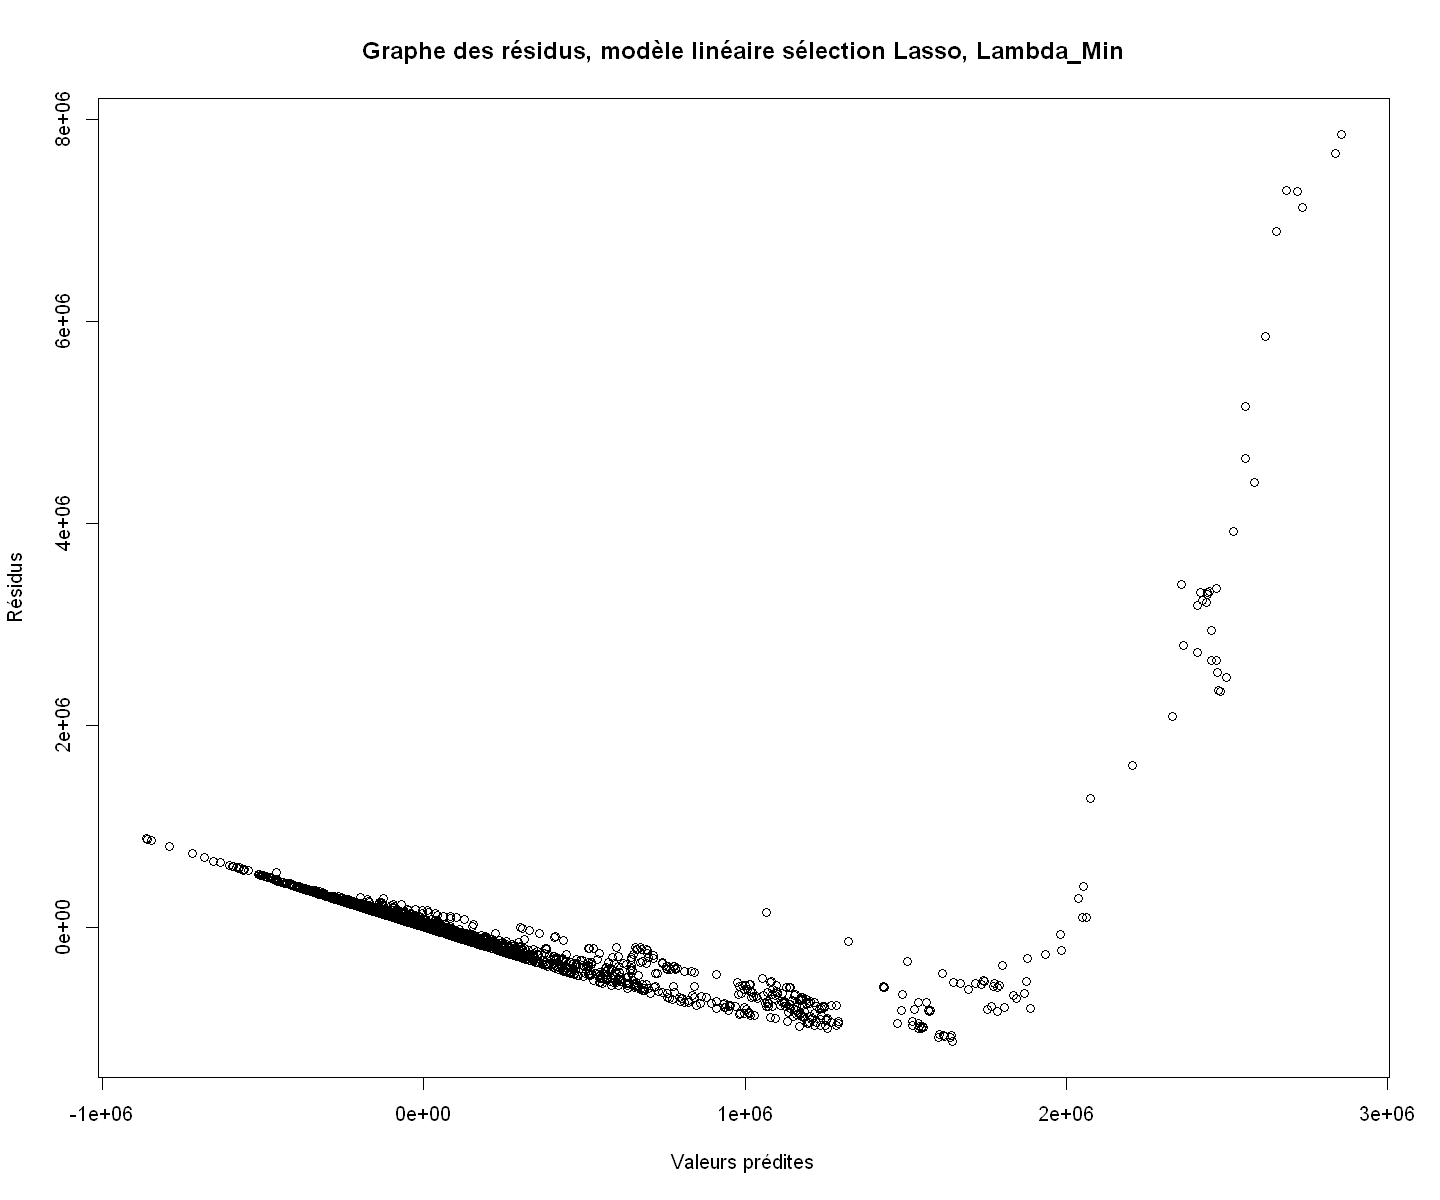

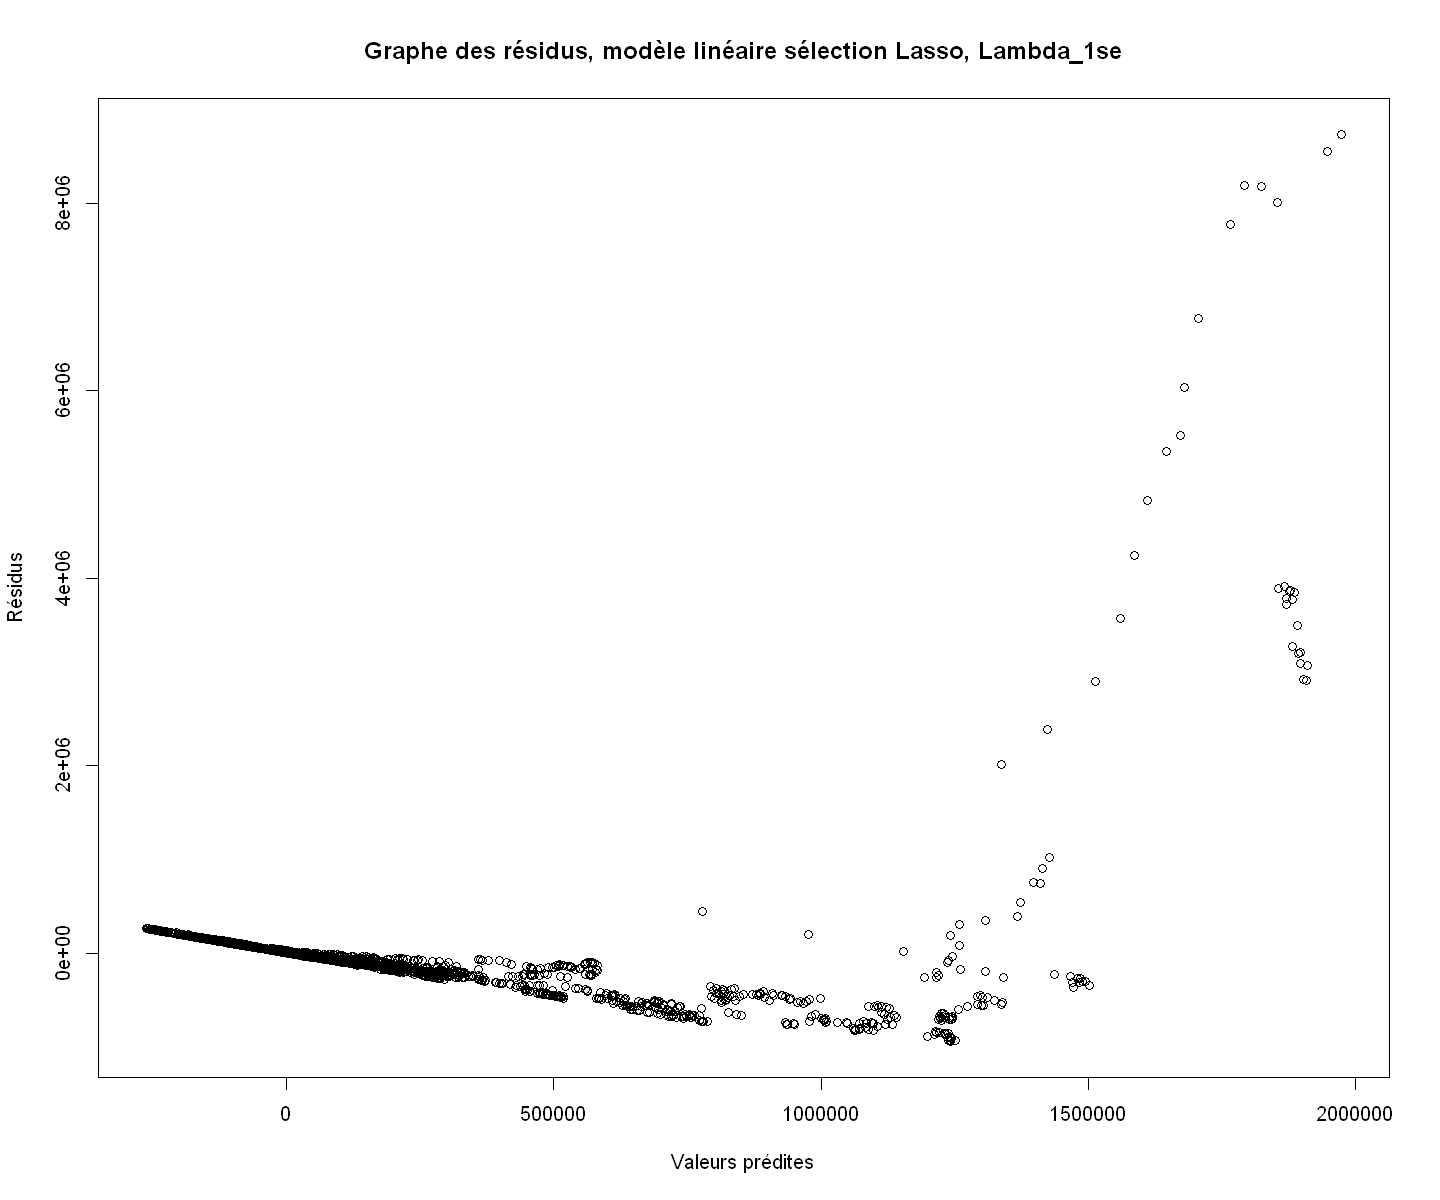

In [33]:
# Comparaison entre ML sans sélection et ML Lasso (pour Lambda_min et Lambda_se)

# Modèle Linéaire, Lasso, Lambda_min

fit.lasso.min = predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso.min = CO2_appr - fit.lasso.min

# Modèle Linéaire, Lasso, Lambda1se

fit.lasso.1se = predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se = CO2_appr - fit.lasso.1se

# Affichage

plot(fit.lm, res.lm, main="Graphe des résidus, modèle linéaire sans sélection", xlab = "Valeurs prédites", ylab = "Résidus")
plot(fit.lasso.min, res.lasso.min, main = "Graphe des résidus, modèle linéaire sélection Lasso, Lambda_Min", xlab = "Valeurs prédites", ylab = "Résidus")
plot(fit.lasso.1se, res.lasso.1se, main = "Graphe des résidus, modèle linéaire sélection Lasso, Lambda_1se", xlab = "Valeurs prédites", ylab = "Résidus")


**Interprétation :**

Encore une fois mes résidus sont pas du tout bon je comprends pas... Au moins il y aura le code de base mais bon...

#### Avec pénalisation Ridge

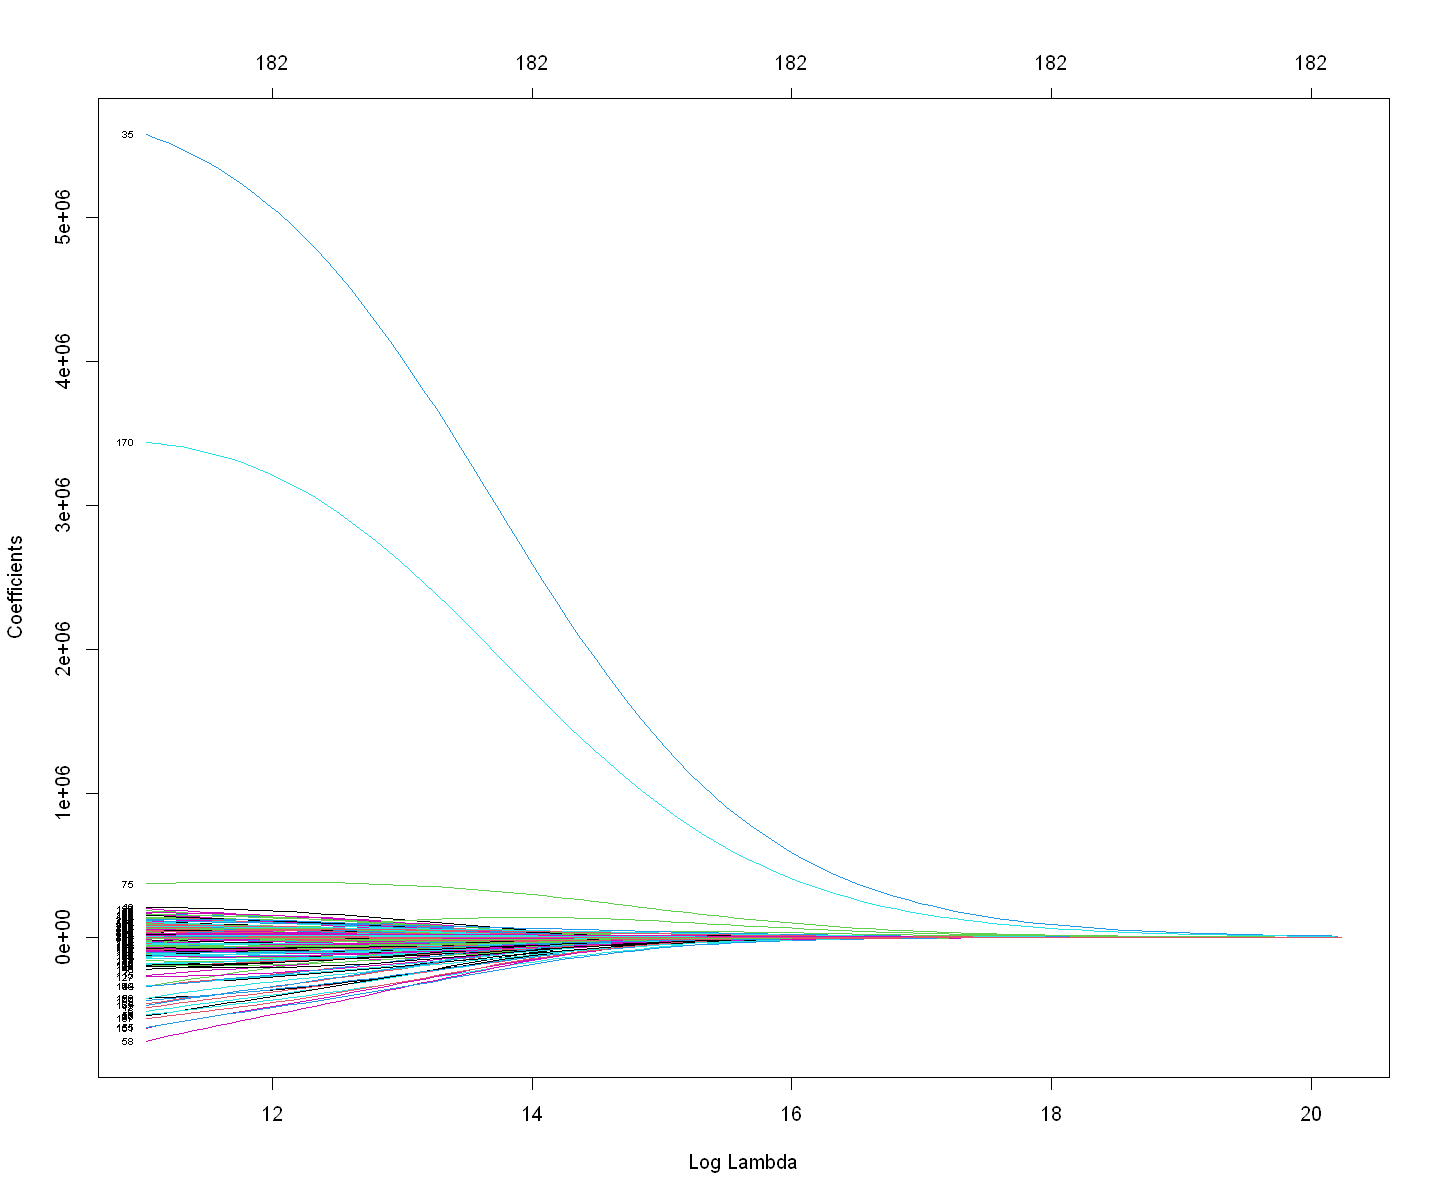

In [39]:
# avec des variables quantitatives seulement

reg.ridge.quanti = glmnet(y = CO2_appr, x = as.matrix(data_appr[, -c(1, 2)]), alpha = 0)
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)

x.mat = model.matrix(CO2_appr ~ . - 1, data = data_appr) # on récupère la matrice de design, on enlève intercept.

reg.ridge = glmnet(y = CO2_appr, x = x.mat, alpha = 0)

options(repr.plot.width = 12, repr.plot.height = 10)

plot(reg.ridge, xvar = "lambda", label = TRUE)

# legend("topright", legend = paste(1:ncol(x.mat), " - ", colnames(x.mat))) # si on affiche la légende on voit pas le graph entier...

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  225953.887"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  61427.558"

[1] "Modèle correspondant à lambda1se = meilleur lambda par validation croisée : "

212 x 1 sparse Matrix of class "dgCMatrix"
                                                 s1
(Intercept)                            -367717.8558
EntityAfghanistan                        67096.6334
EntityAlbania                                .     
EntityAlgeria                           -76090.7052
EntityAngola                            -18446.9524
EntityAntigua and Barbuda               125182.5550
EntityArgentina                        -359791.2237
EntityArmenia                           -70303.6247
EntityAruba                                  .     
EntityAustralia                        -130593.3844
EntityAustria                          -141176.9731
EntityAzerbaijan                       -136164.2678
EntityBahamas                                .     
EntityBahrain                           -65678.3958
EntityBangladesh                       -139698.9615
EntityBarbados                           96244.7153
EntityBelarus                           -93461.1405
EntityBelgium        

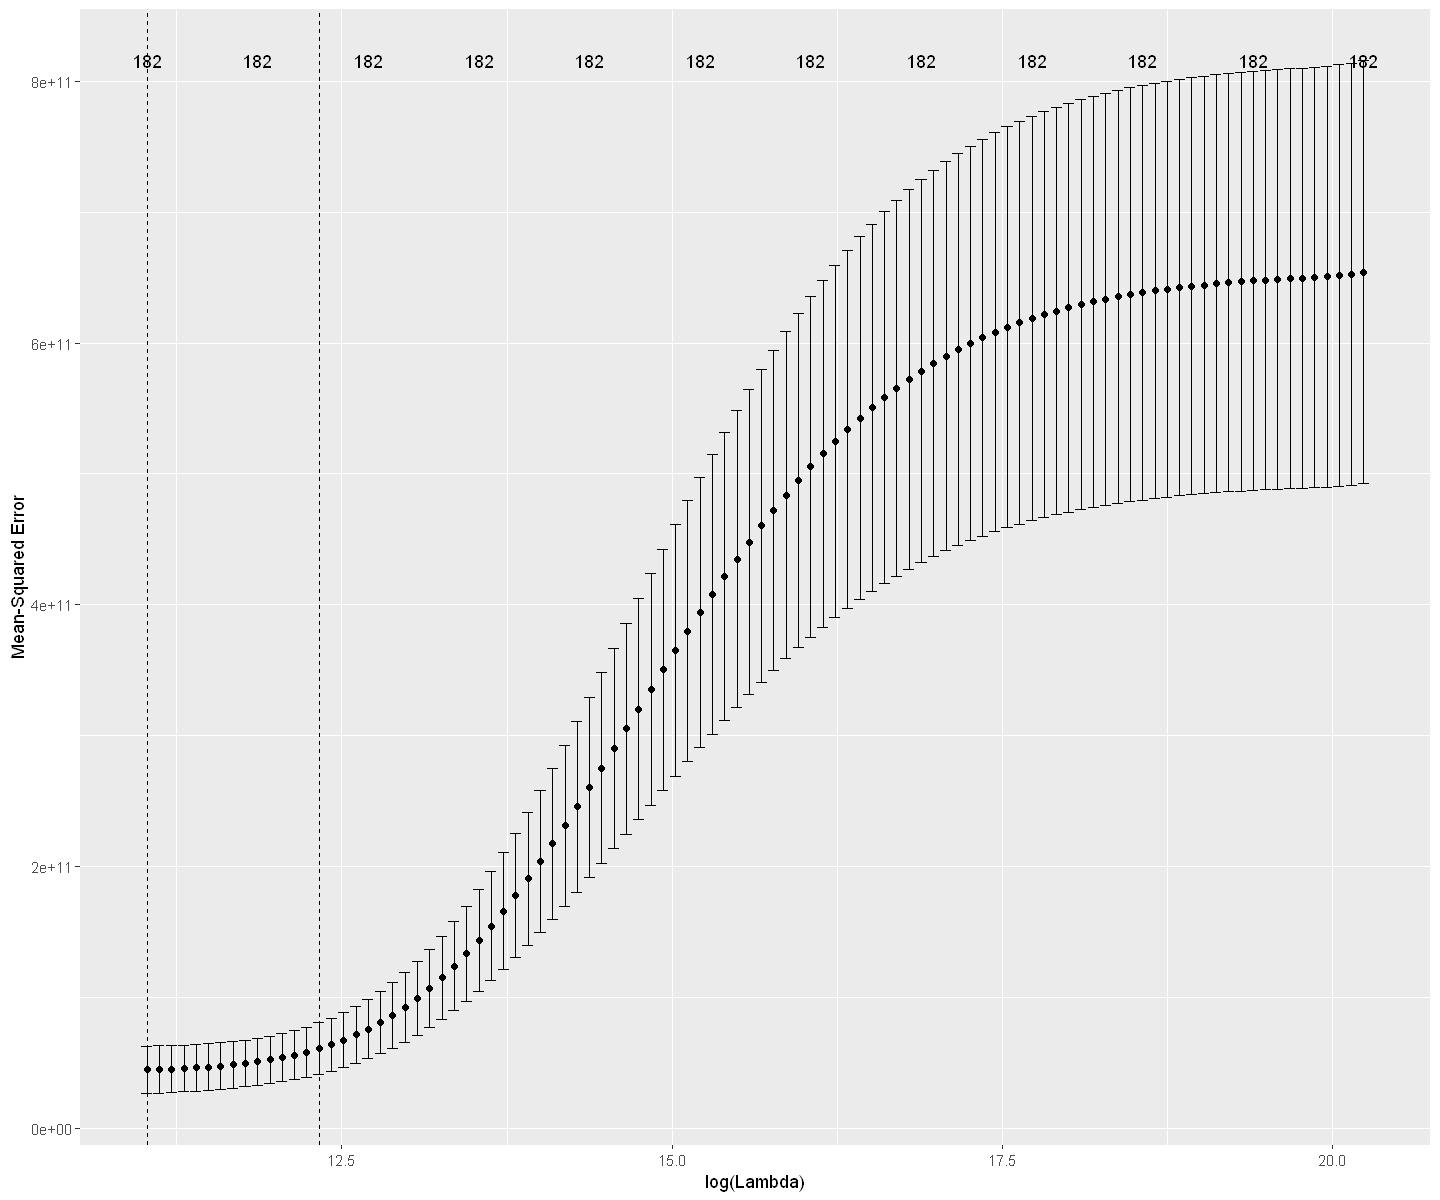

In [41]:
# on cherche à déterminer le meilleur Lambda pour notre model ridge : on va faire de la validation croisée (cross-validation)

reg.ridge.cv = cv.glmnet(y = CO2_appr, x = x.mat, alpha = 0)

autoplot(reg.ridge.cv)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.ridge.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.ridge.cv$lambda.min, 3))
paste("Modèle correspondant à lambda1se = meilleur lambda par validation croisée : ")
coef(reg.ridge.cv, s="lambda.1se")

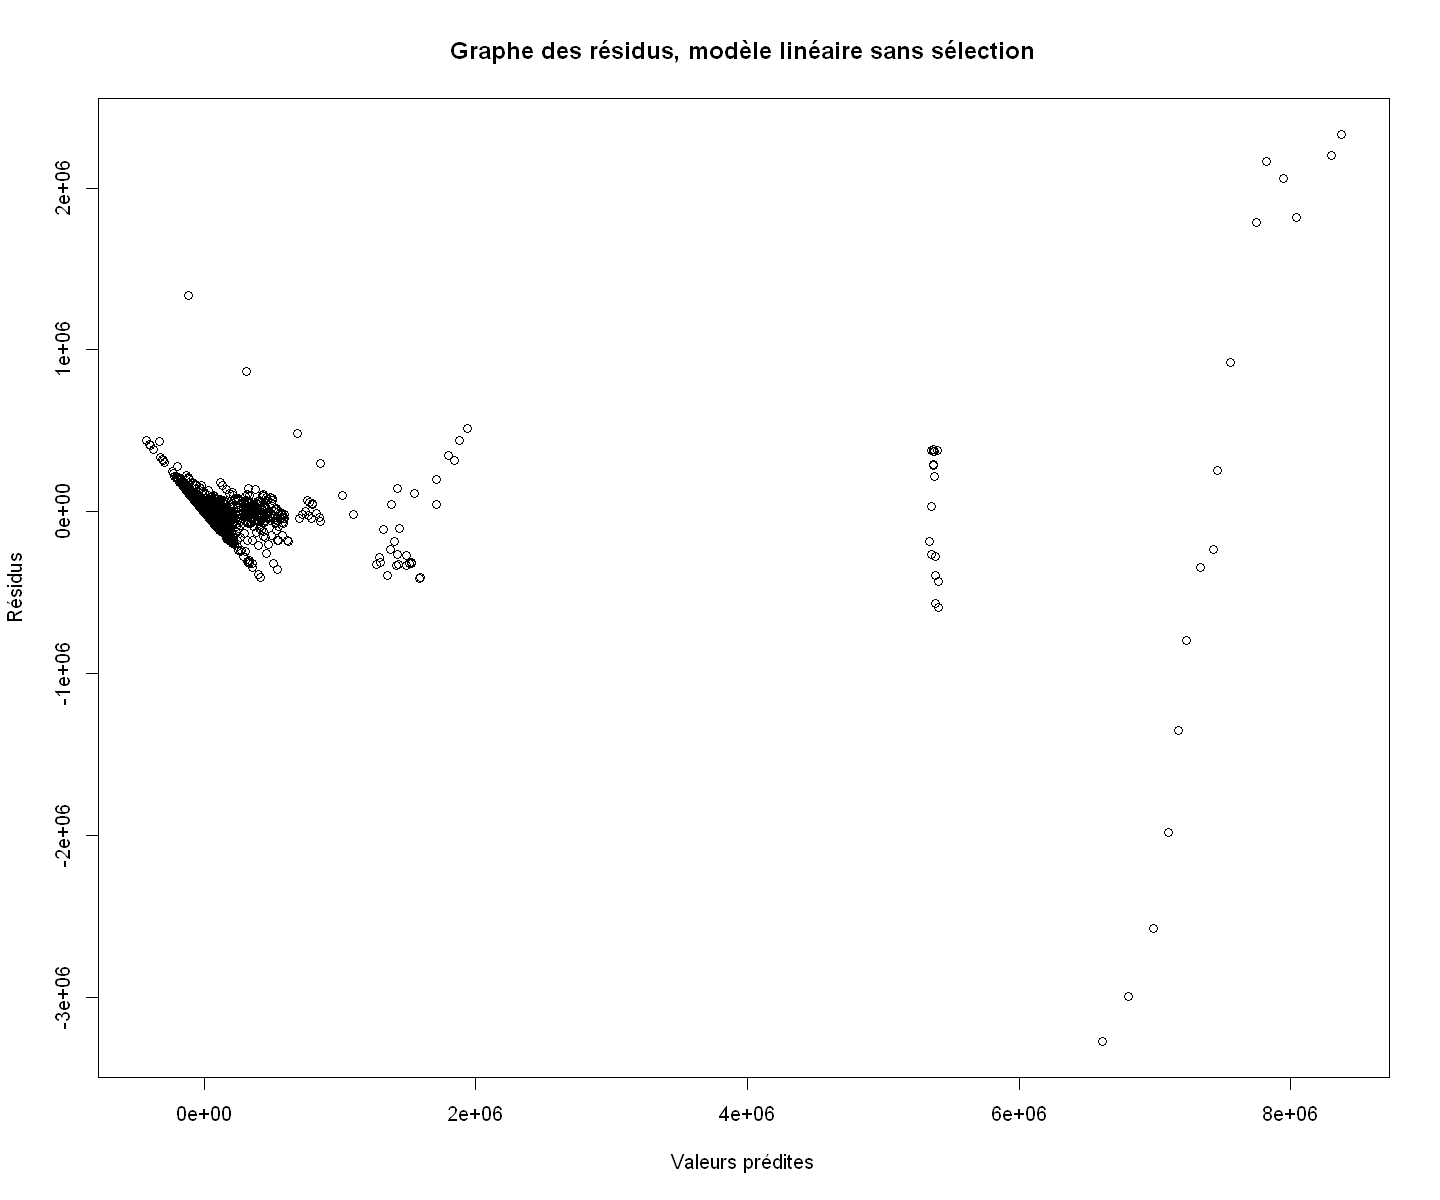

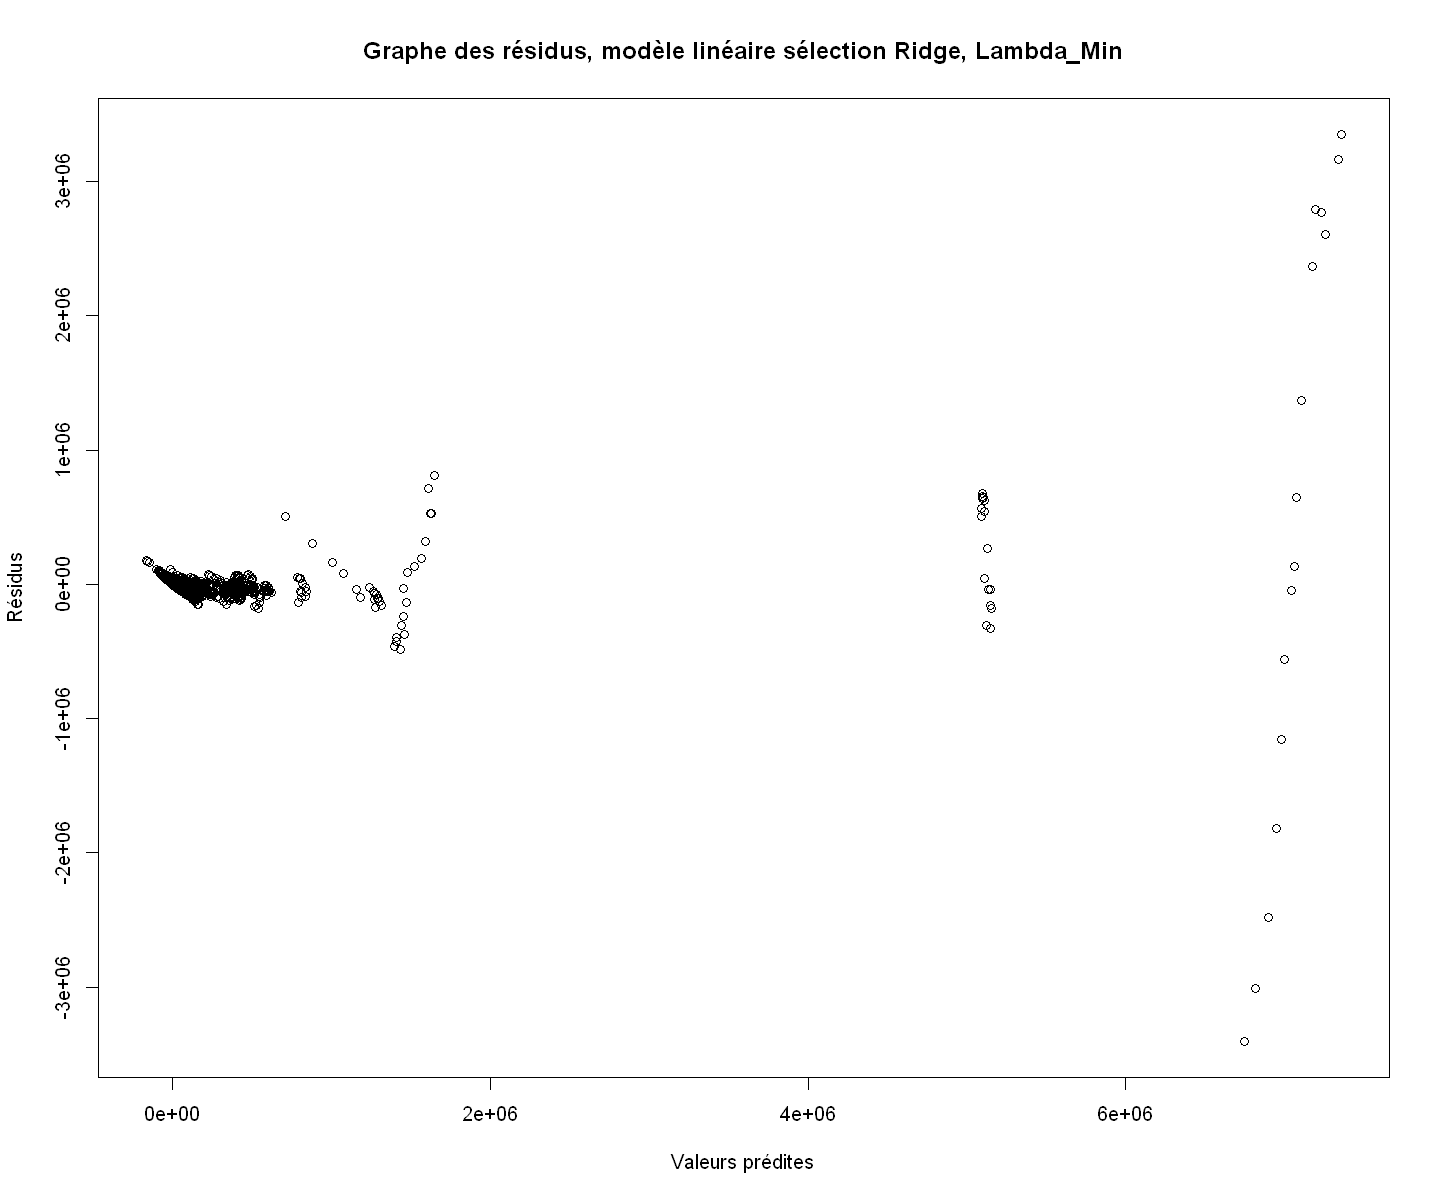

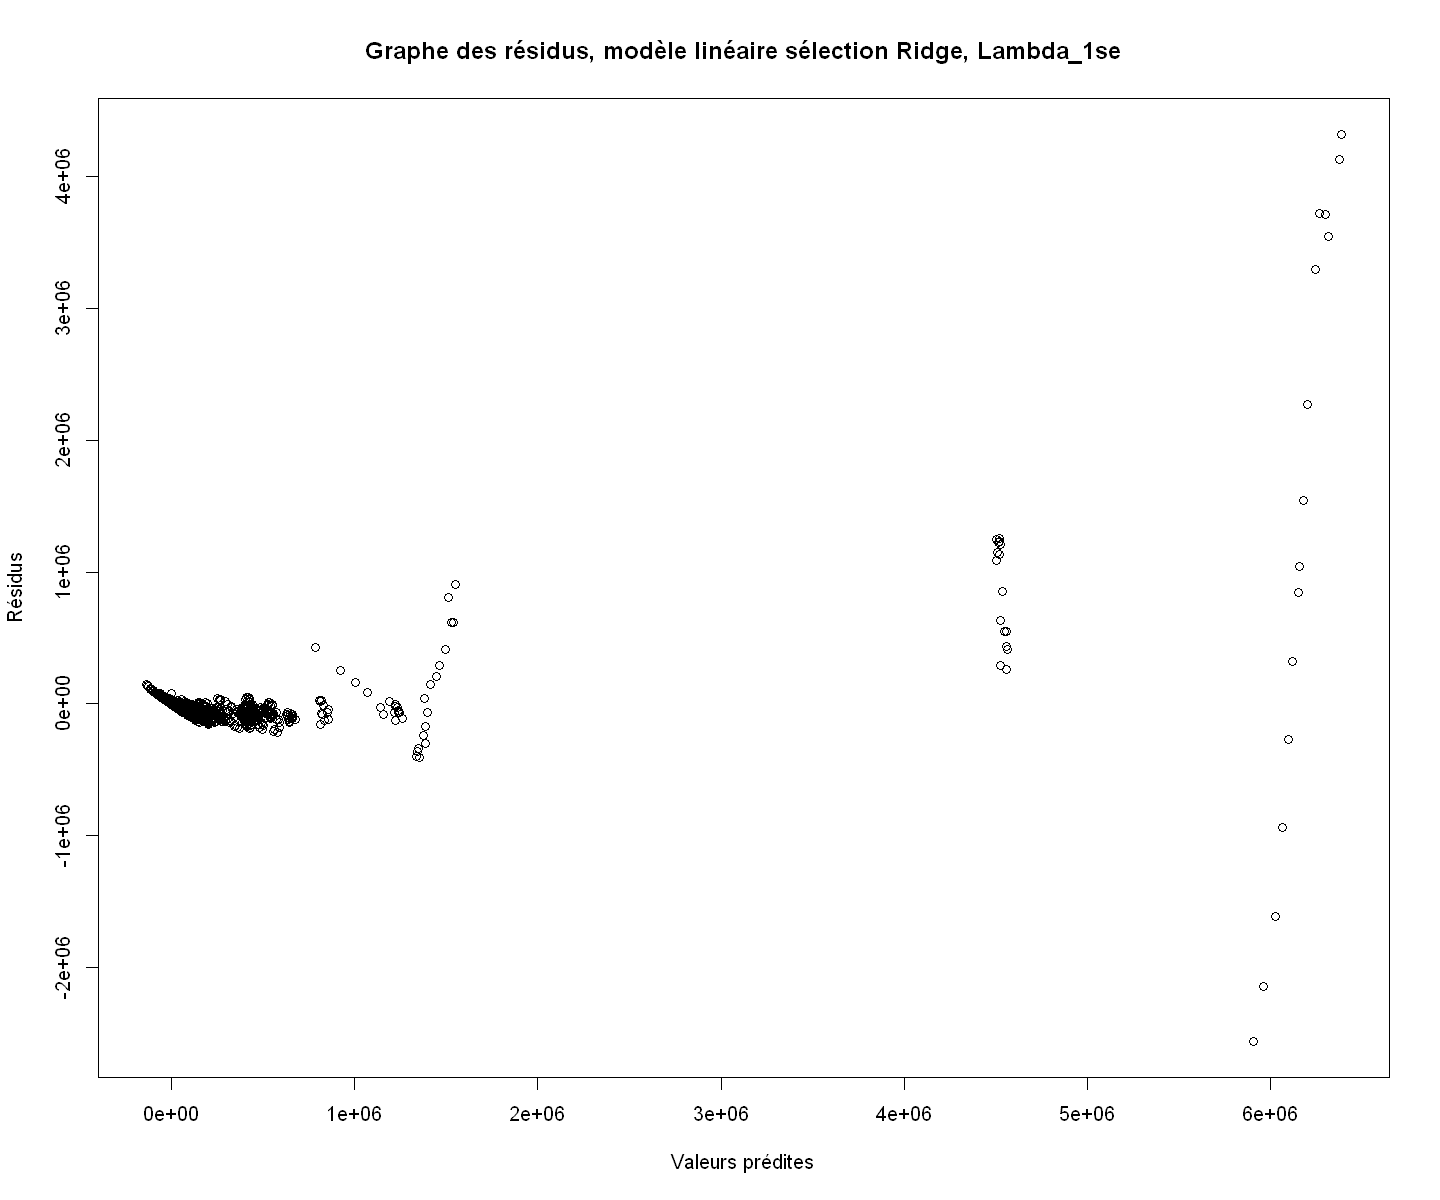

In [42]:
# Comparaison entre ML sans sélection et ML Ridge (pour Lambda_min et Lambda_se)

# Modèle Linéaire, Ridge, Lambda_min

fit.ridge.min = predict(reg.ridge.cv, s = "lambda.min", newx = x.mat)
res.ridge.min = CO2_appr - fit.ridge.min

# Modèle Linéaire, Ridge, Lambda1se

fit.ridge.1se = predict(reg.ridge.cv, s = "lambda.1se", newx = x.mat)
res.ridge.1se = CO2_appr - fit.ridge.1se

# Affichage

plot(fit.lm, res.lm, main="Graphe des résidus, modèle linéaire sans sélection", xlab = "Valeurs prédites", ylab = "Résidus")
plot(fit.ridge.min, res.ridge.min, main = "Graphe des résidus, modèle linéaire sélection Ridge, Lambda_Min", xlab = "Valeurs prédites", ylab = "Résidus")
plot(fit.ridge.1se, res.ridge.1se, main = "Graphe des résidus, modèle linéaire sélection Ridge, Lambda_1se", xlab = "Valeurs prédites", ylab = "Résidus")


#### Comparaison des modèles de régression

In [ ]:
# Code

### 2 - SVM

In [ ]:
# Code